In [1]:
import pandas as pd
import ptitprince as pt
import seaborn as sns
import os
import matplotlib.pyplot as plt
import numpy as np
import os
#sns.set(style="darkgrid")
#sns.set(style="whitegrid")
#sns.set_style("white")
sns.set(style="whitegrid",font_scale=2)
import matplotlib.collections as clt

In [2]:
# settings
savefigs = True
figs_dir = '/home/claire/Documents/STUDY/EEG-Tobacco/Text Messages/skyline/Figures'



In [3]:
df = pd.read_csv ("100219_pilot.csv", sep= ",")


In [4]:
df = df.rename_axis('id').reset_index()

In [5]:
# remove useless columns
df=df.drop(df.iloc[:, [1,2]], axis=1)
df=df.drop(df.iloc[:, 115:145], axis=1)


In [6]:
# create dataframe with question names and comments
comment_cols = [col for col in df.columns if "opinion" in col]
data_cols1 = [col for col in df.columns if "motivates"  in col]
data_cols2 = [col for col in df.columns if "helpful"  in col]

all_data_cols= data_cols1 + data_cols2

df_data = df[all_data_cols]
df_comm = df[comment_cols]

In [7]:
df_data.columns

Index(['Cigarette butts are the most common form of plastic litter in the world. - This message motivates me to want to quit smoking',
       'Cigarette butts leak toxins that contaminate water and harm marine life and the environment - This message motivates me to want to quit smoking',
       'Cigarette butts make up 19-38% of the litter collected on beaches worldwide each year. - This message motivates me to want to quit smoking',
       'While flicking a cigarette down the drain may not seem harmful, this has a direct and often drastic impact on wildlife. Cigarette filters have been found in the stomachs of dead fish, birds, whales who mistake them for food. - This message motivates me to want to quit smoking',
       'Cigarette filters are made of a very fine, fibrous plastic called cellulose acetate which can take up to 12 years to degrade when in the environment. - This message motivates me to want to quit smoking',
       'Personal ashtrays fit in your pocket. Do you know you c

In [8]:
# give useful column names
oricols =list(df_data.columns)
cols=["question"+ str(x+1) for x in range(len(oricols))]

oricom = list(df_comm.columns)
comcols=["comment"+ str(x+1) for x in range(len(oricom))]

df_data.columns=cols
df_comm.columns=comcols



In [9]:
df_data = df_data.rename_axis('id').reset_index()

In [10]:
# tidy up data frame: conversion from wide to long format
df_data=pd.wide_to_long(df_data, stubnames ="question", i="id", j="answer")

df_data.reset_index(inplace=True)





In [11]:
# fix column names order
new_cols=["id", "question", "answer"]
df_data.columns=new_cols

In [12]:
# sort by participant
#df_data.sort_values(by=['id'])

In [13]:
# Plotting
#----------------

/home/claire/.local/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<Figure size 432x288 with 0 Axes>

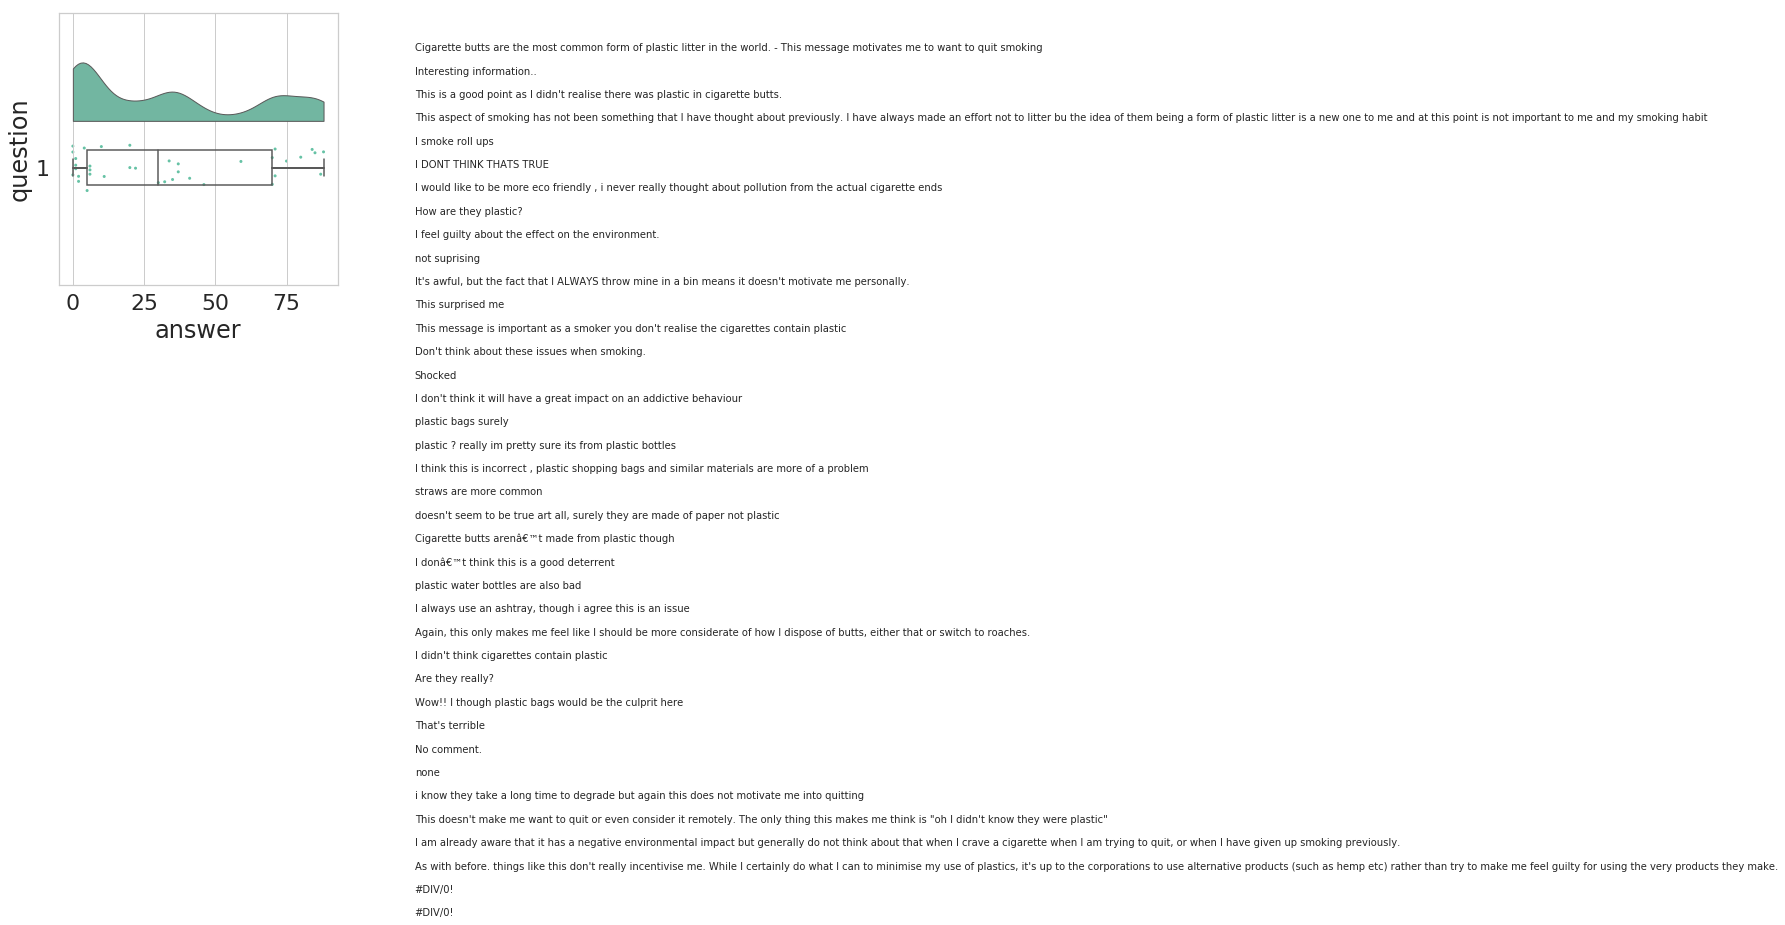

<Figure size 432x288 with 0 Axes>

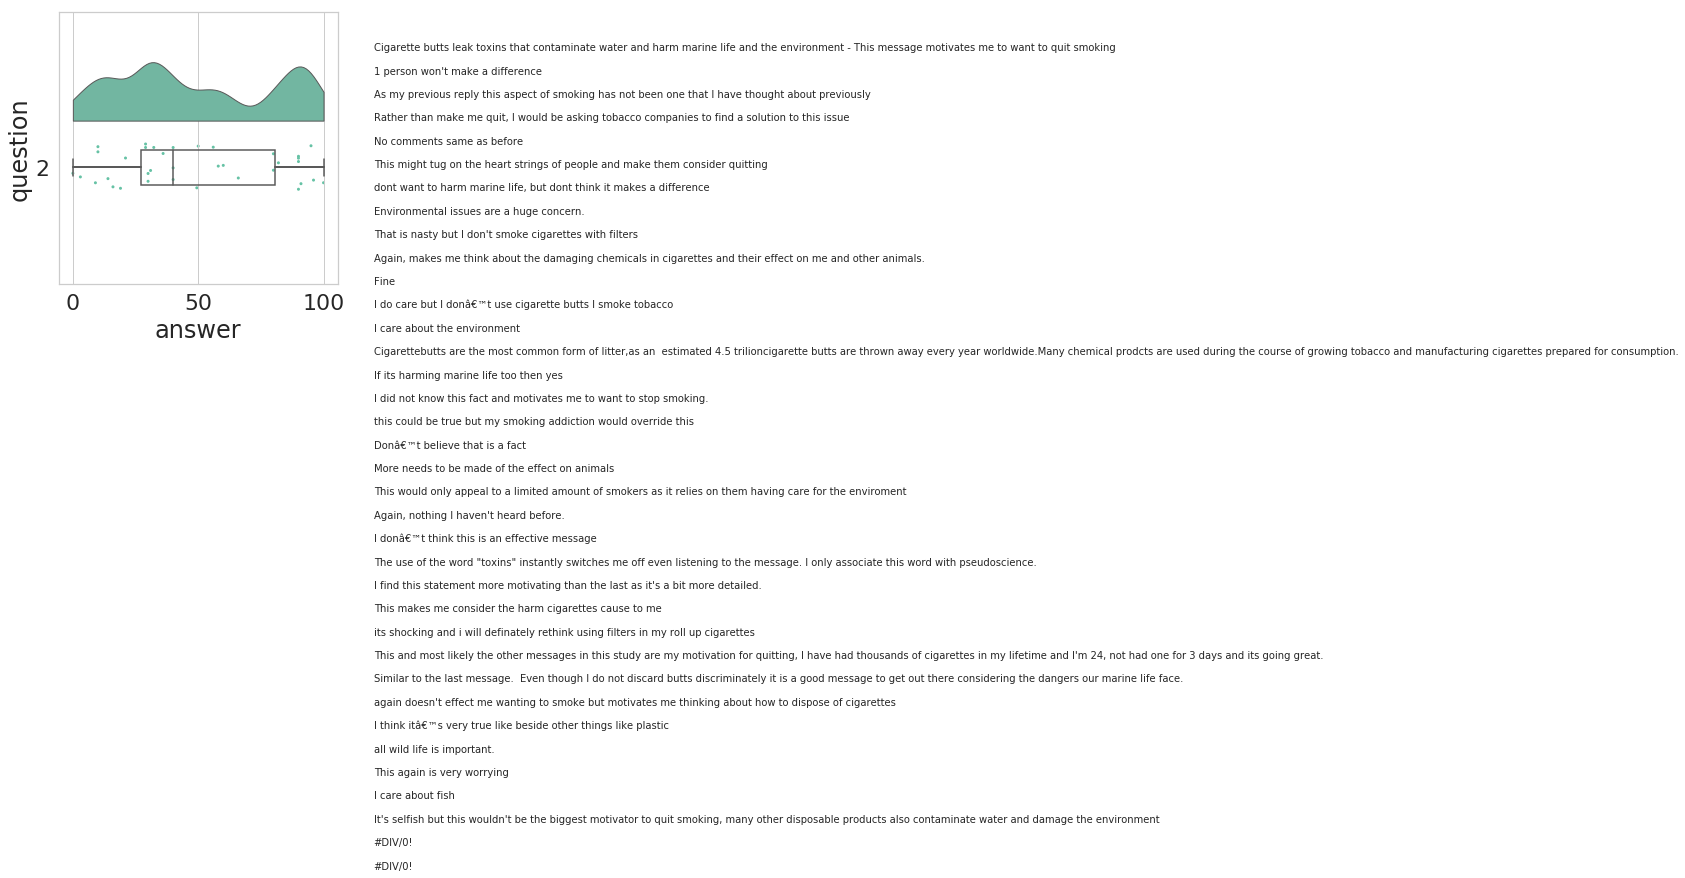

<Figure size 432x288 with 0 Axes>

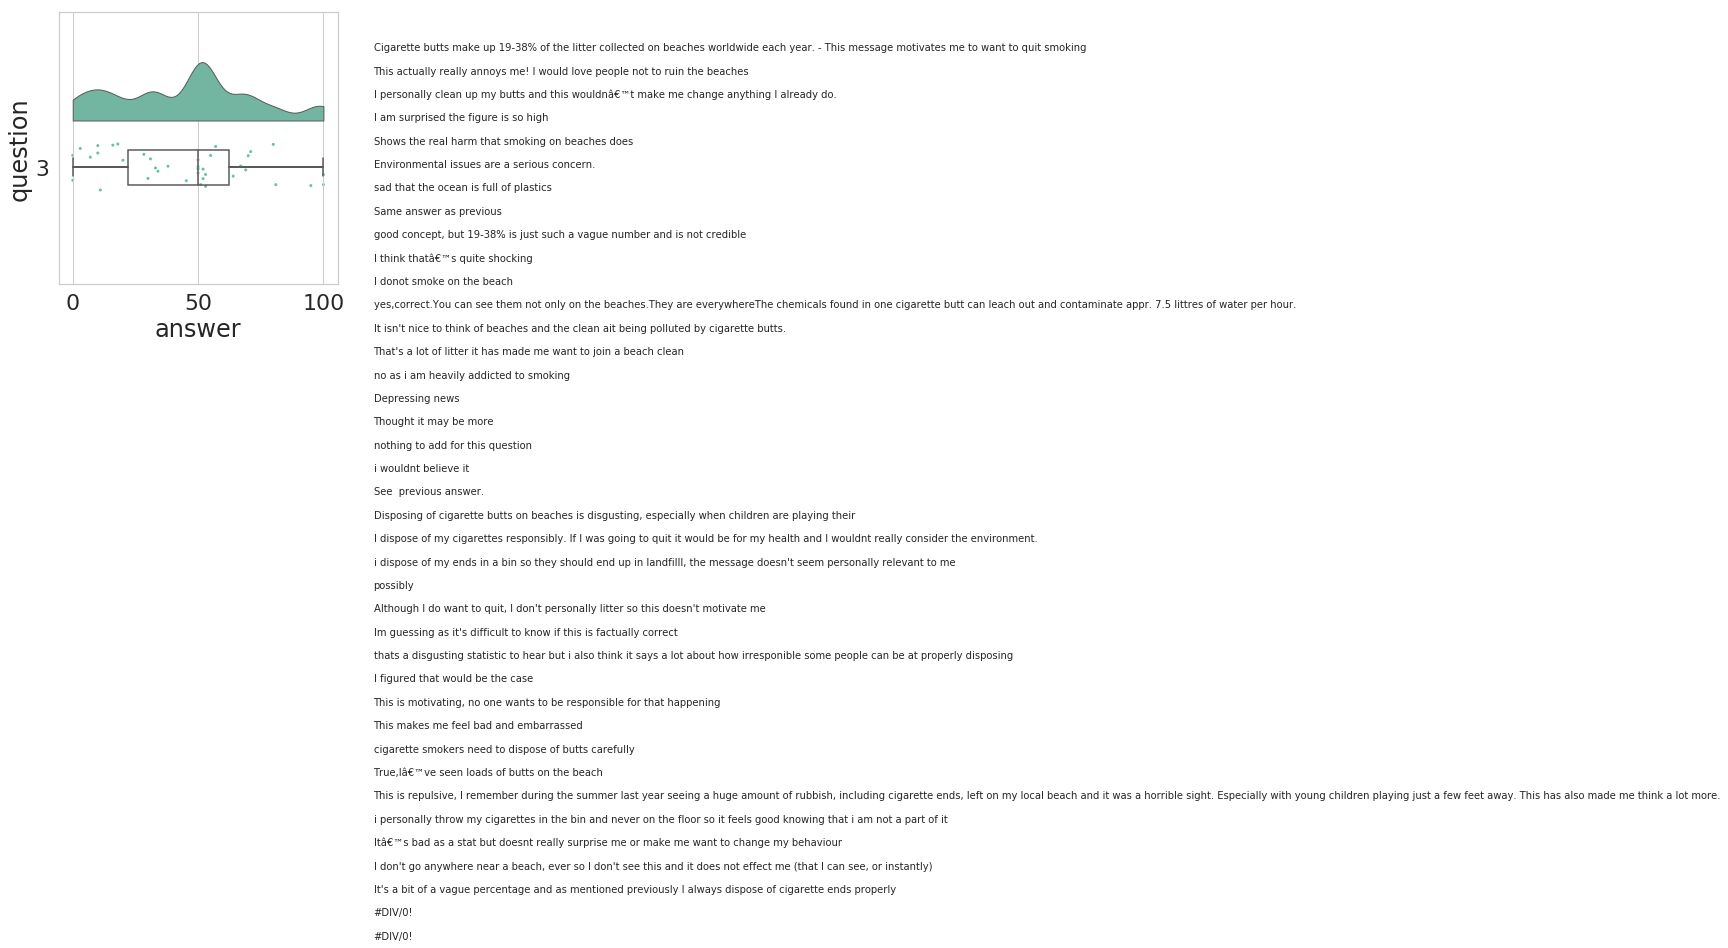

<Figure size 432x288 with 0 Axes>

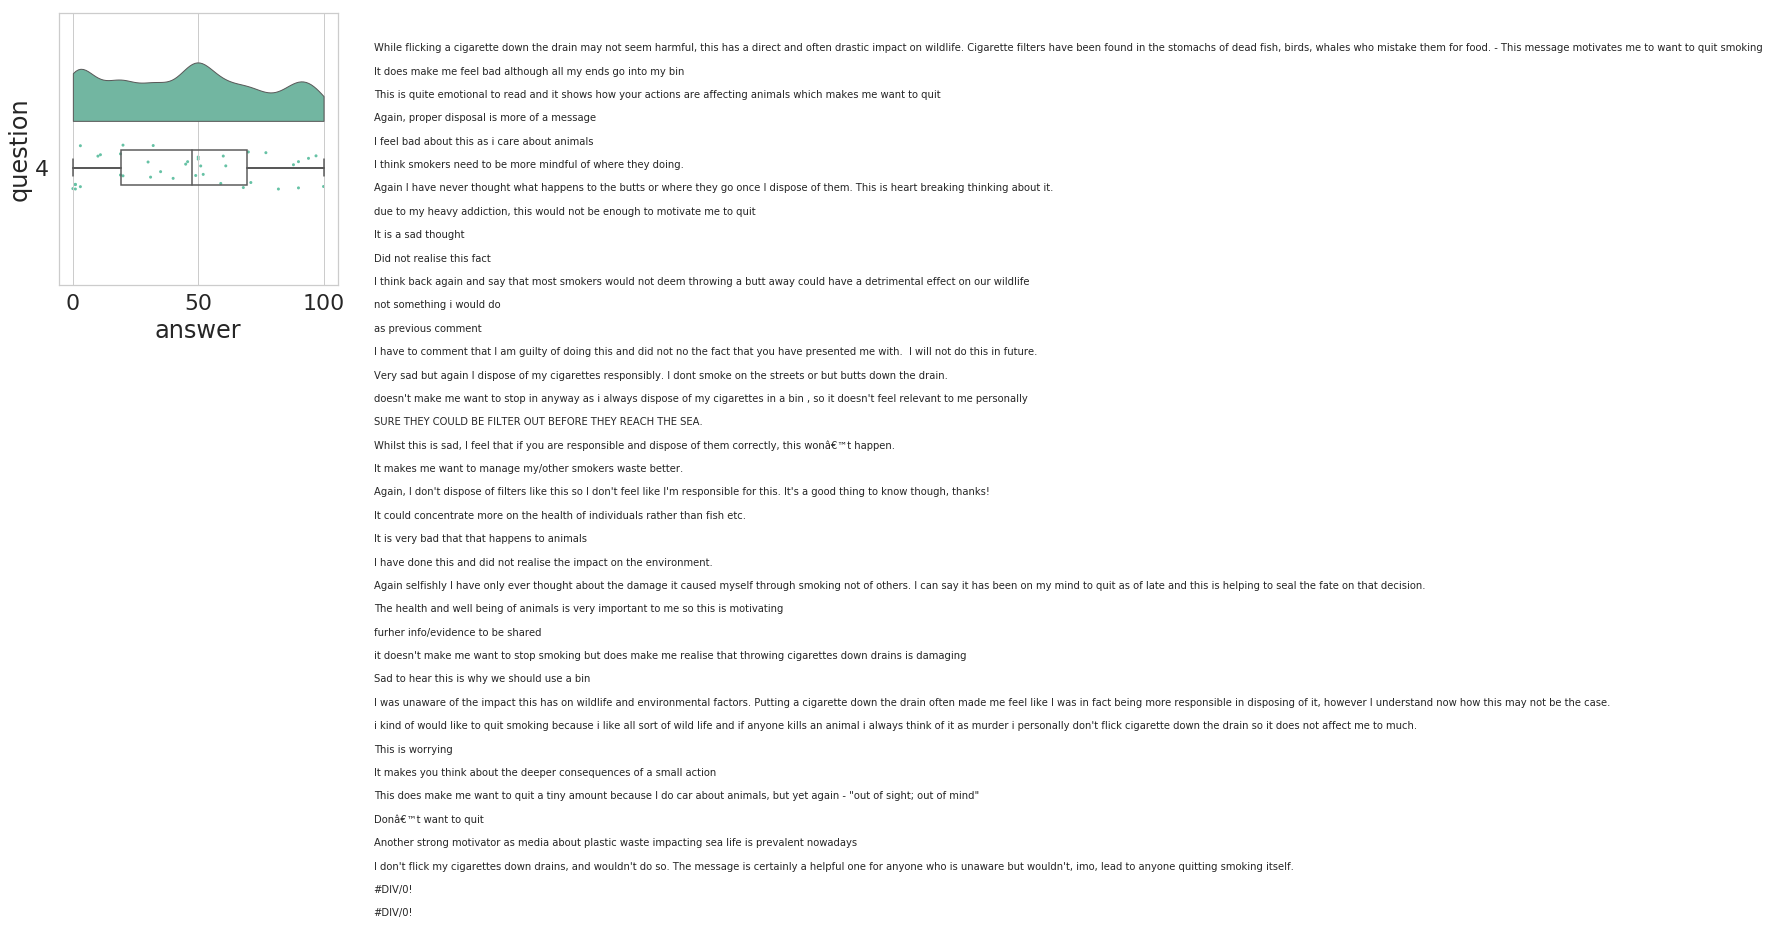

<Figure size 432x288 with 0 Axes>

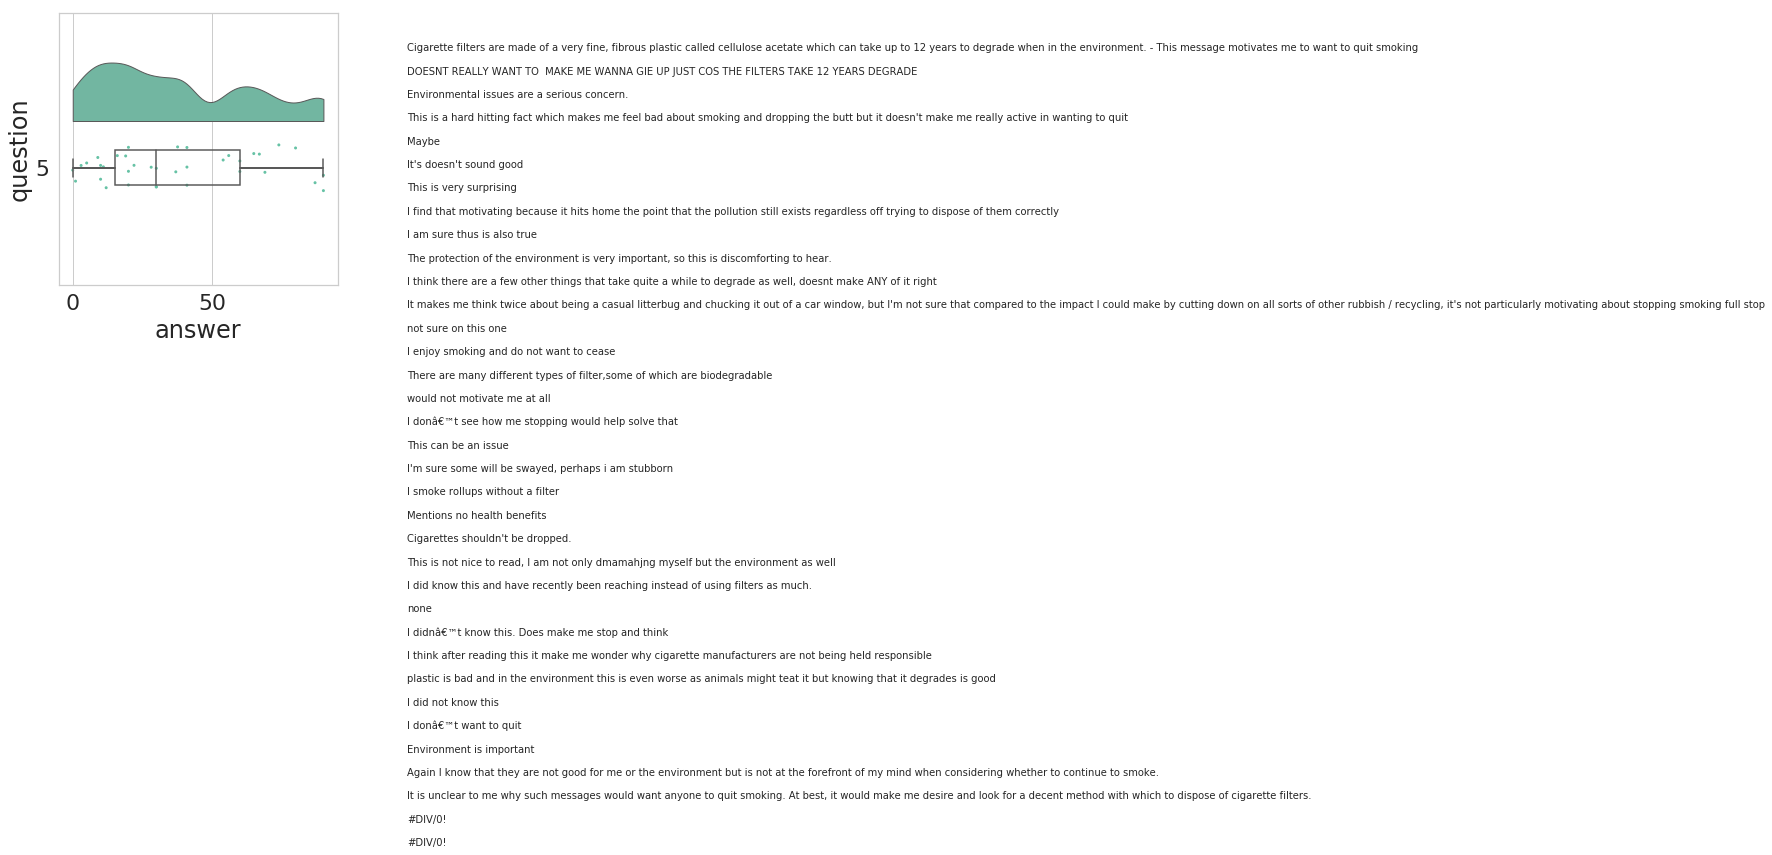

<Figure size 432x288 with 0 Axes>

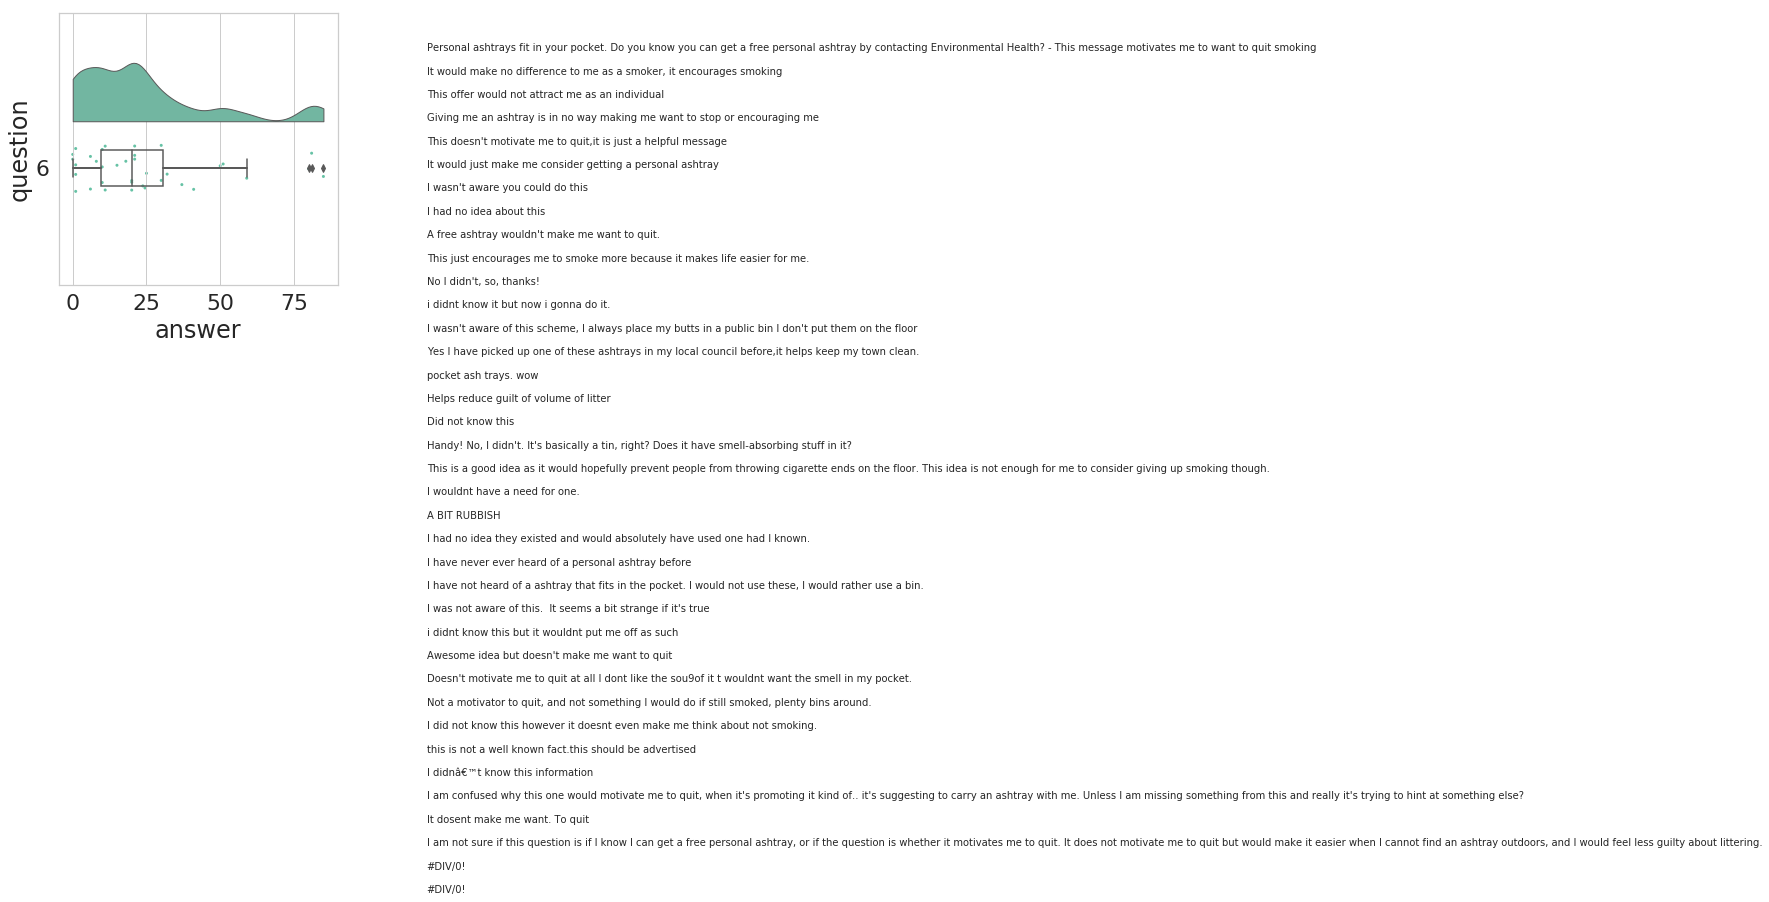

<Figure size 432x288 with 0 Axes>

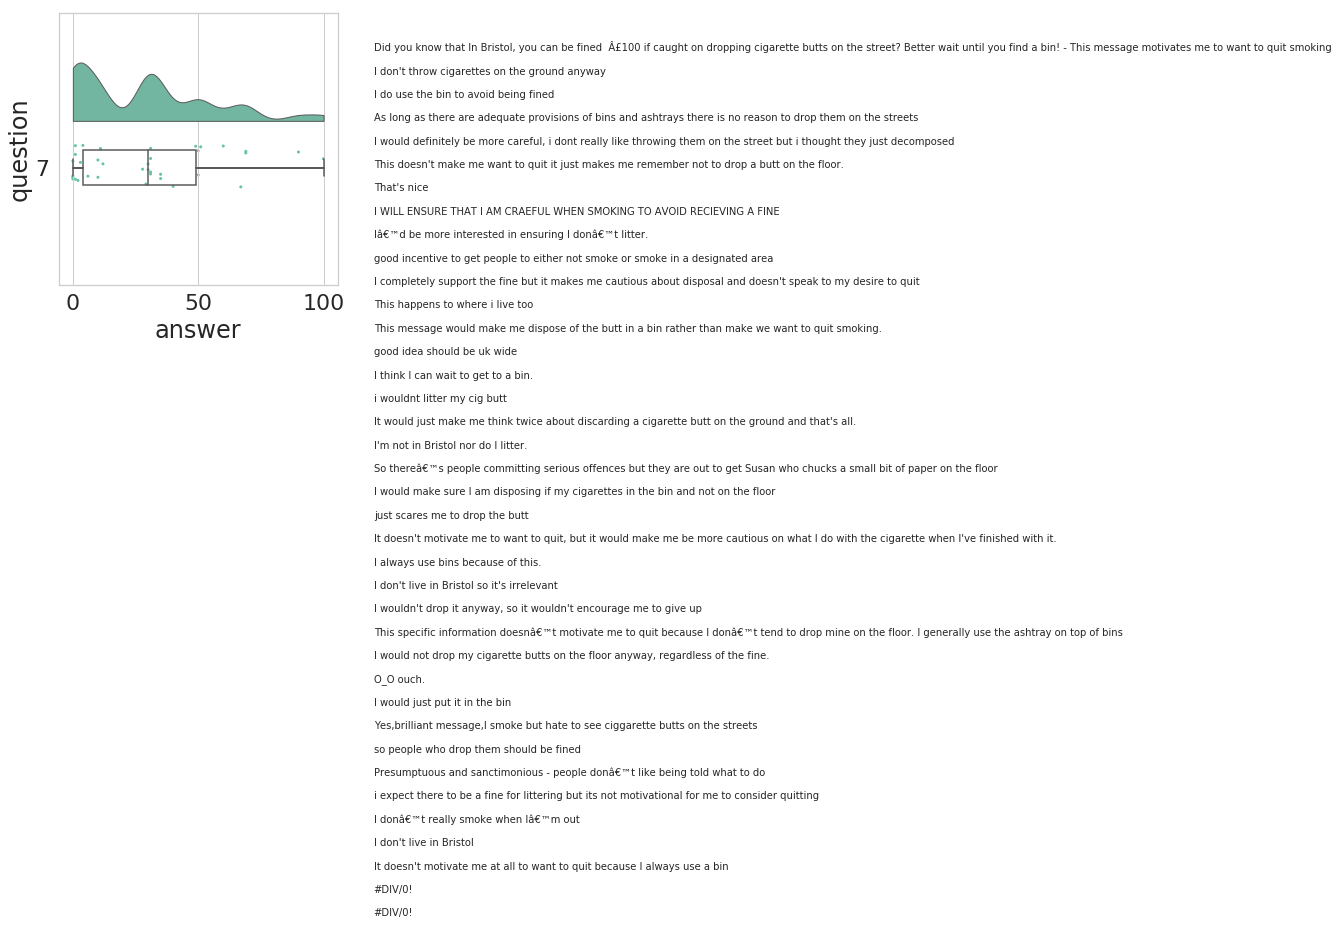

<Figure size 432x288 with 0 Axes>

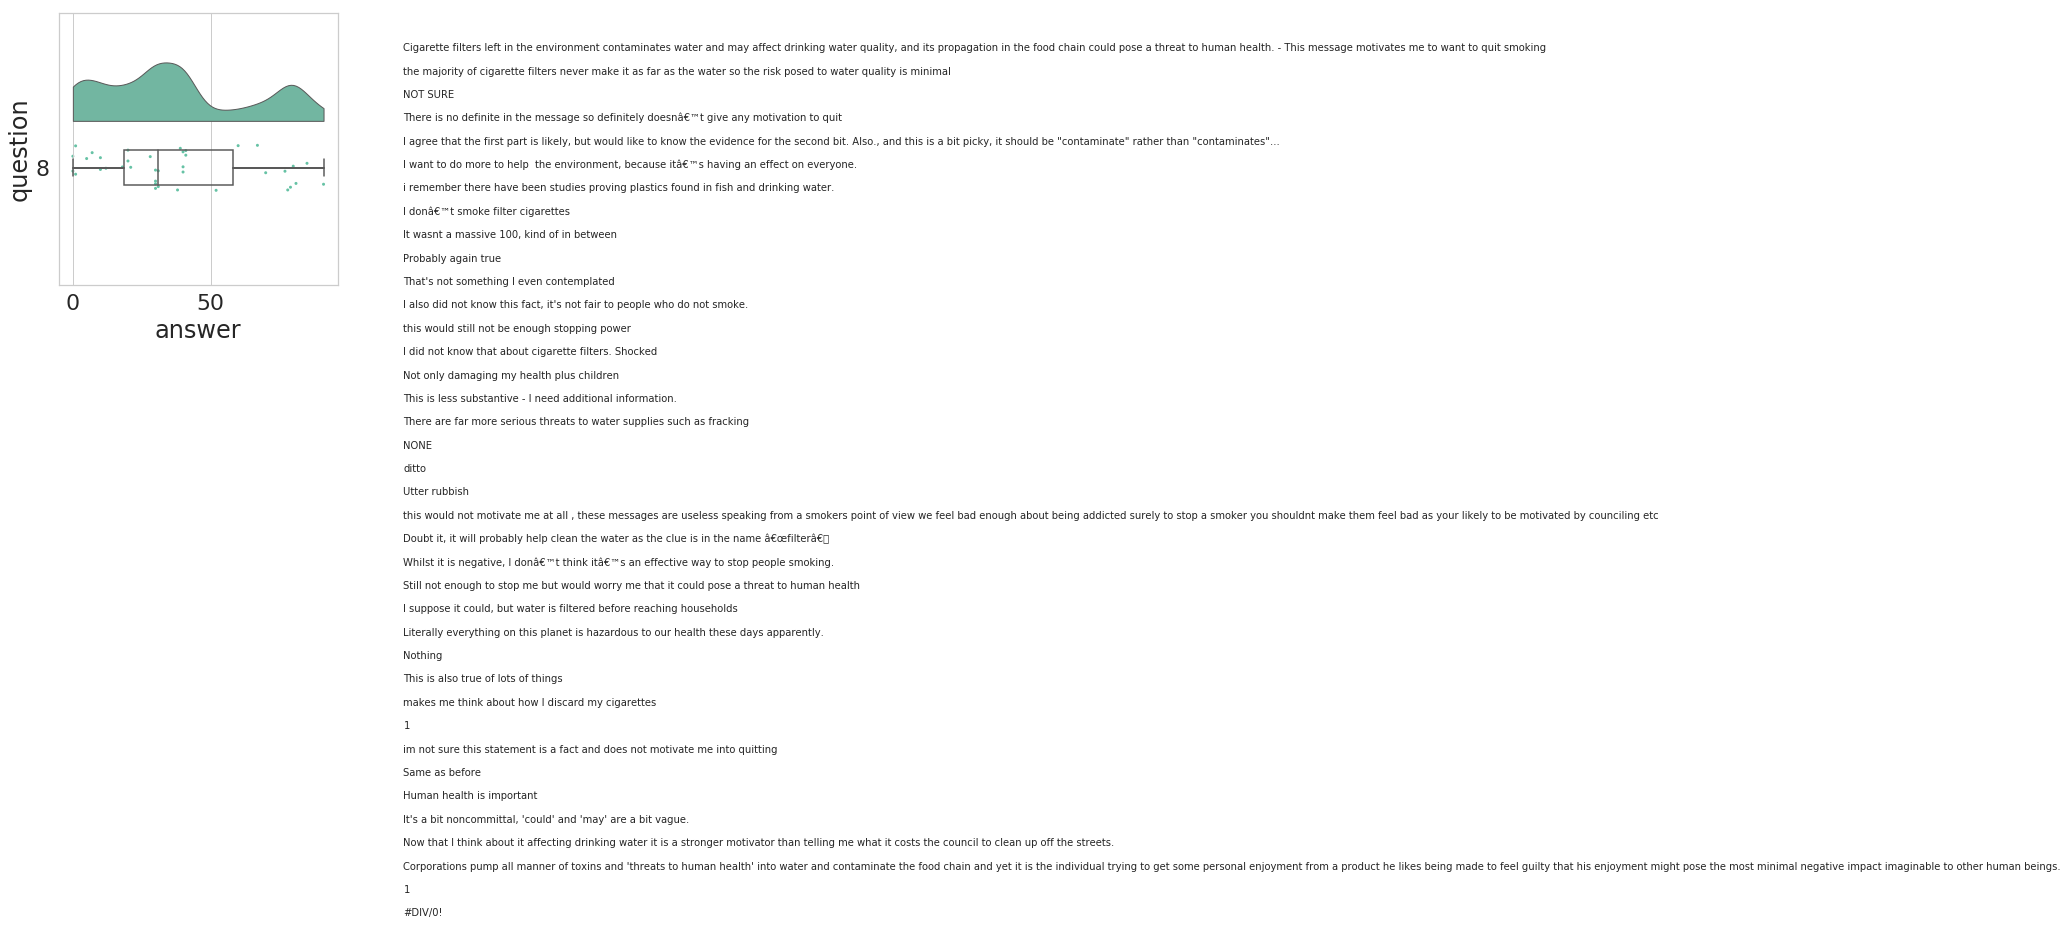

<Figure size 432x288 with 0 Axes>

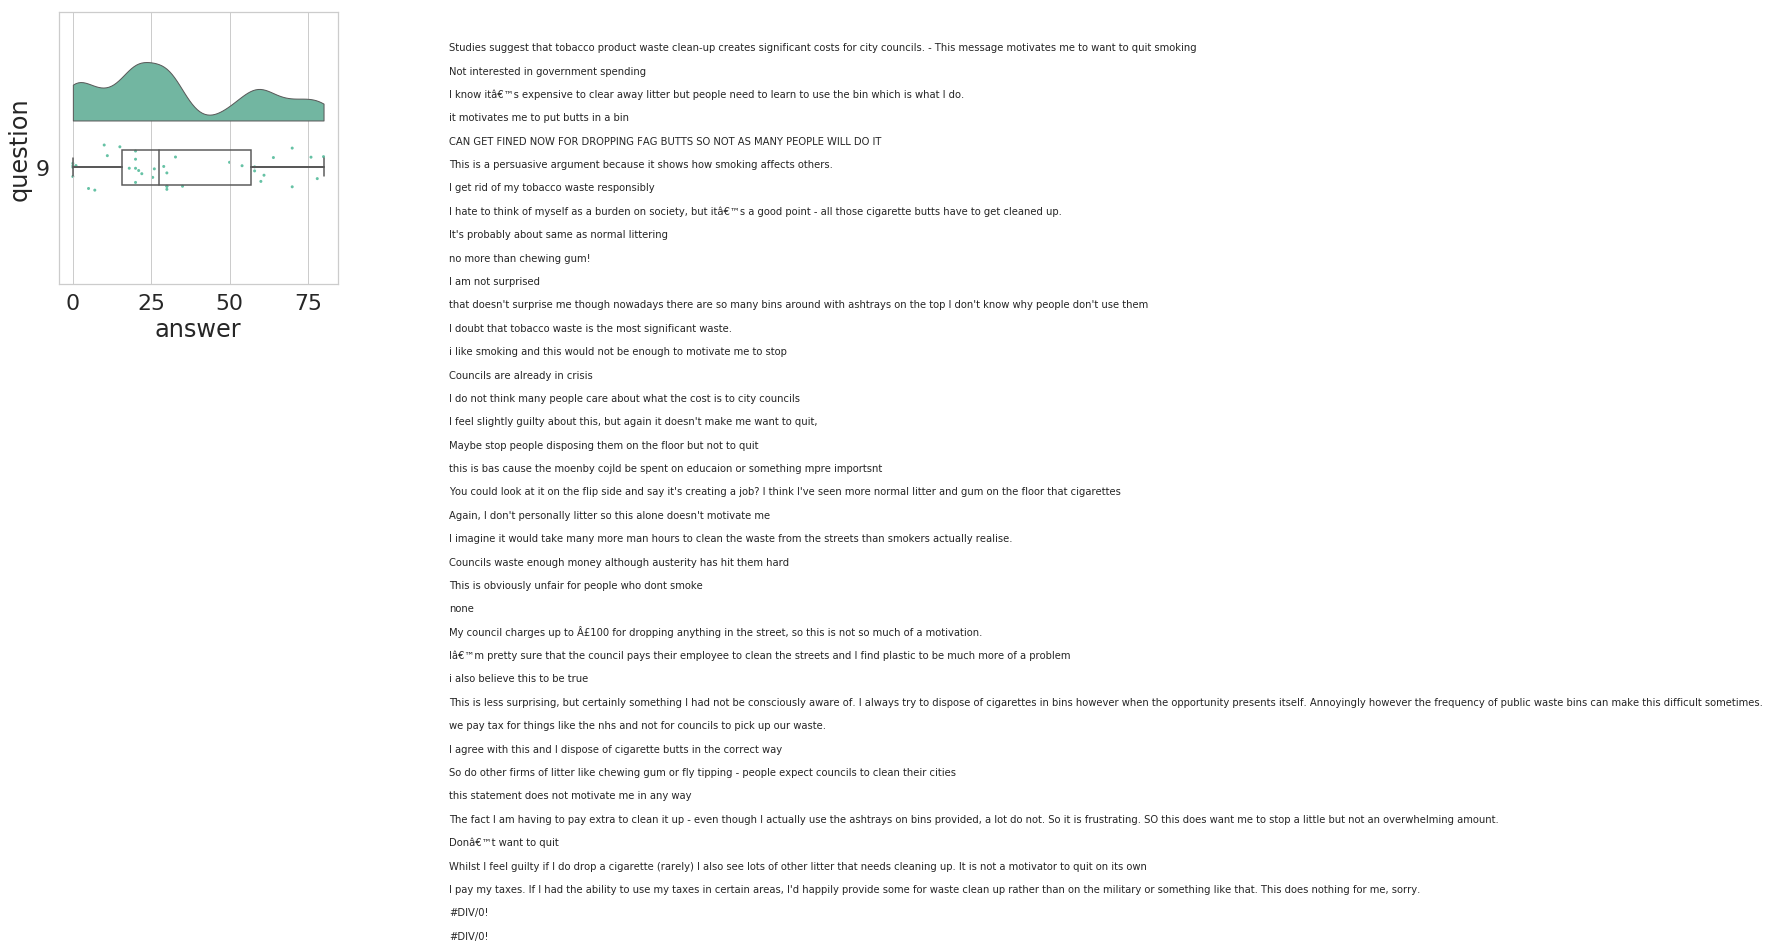

<Figure size 432x288 with 0 Axes>

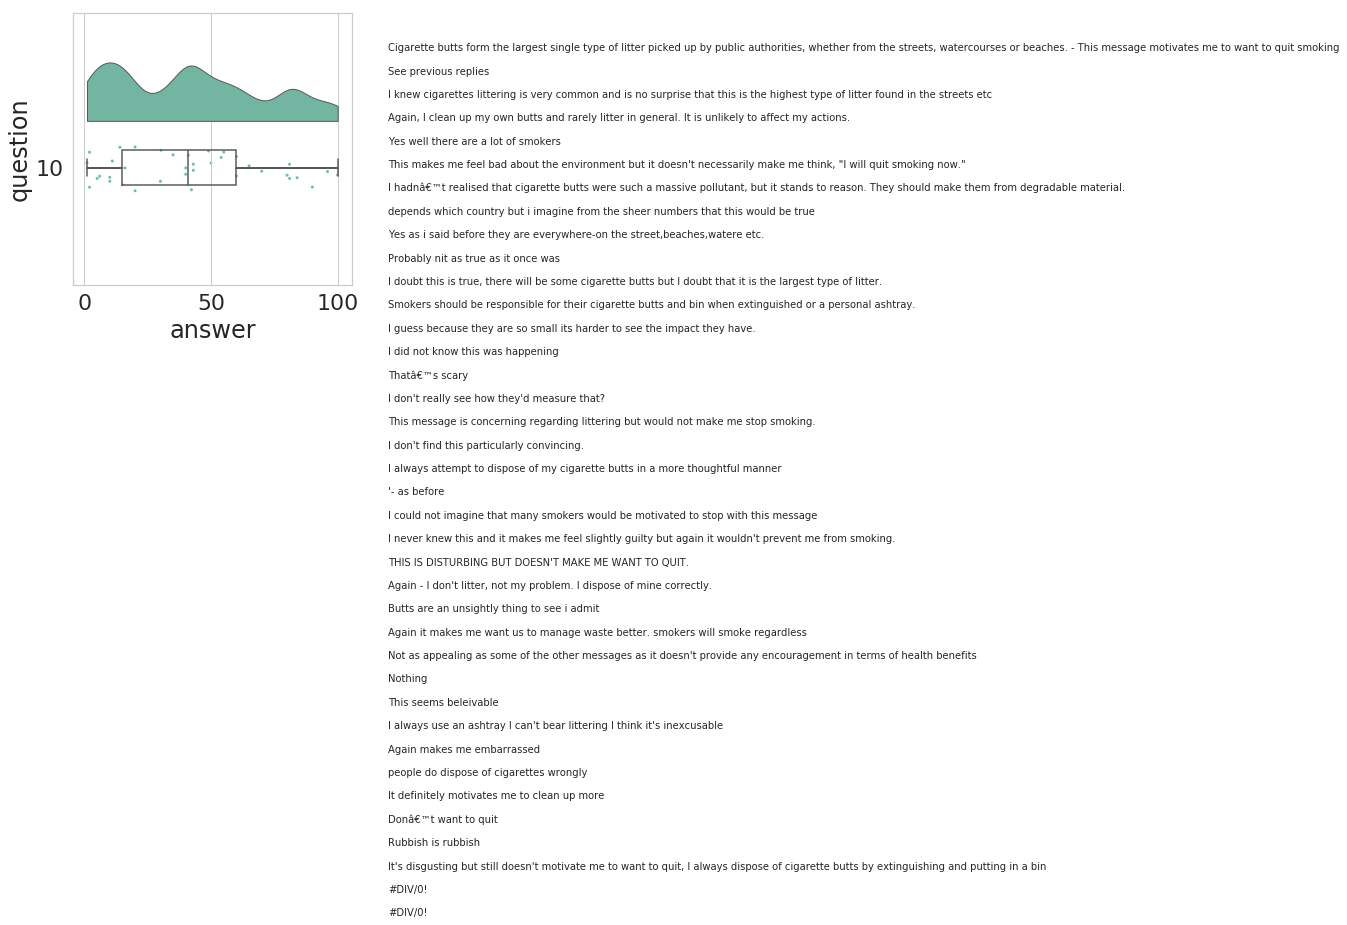

<Figure size 432x288 with 0 Axes>

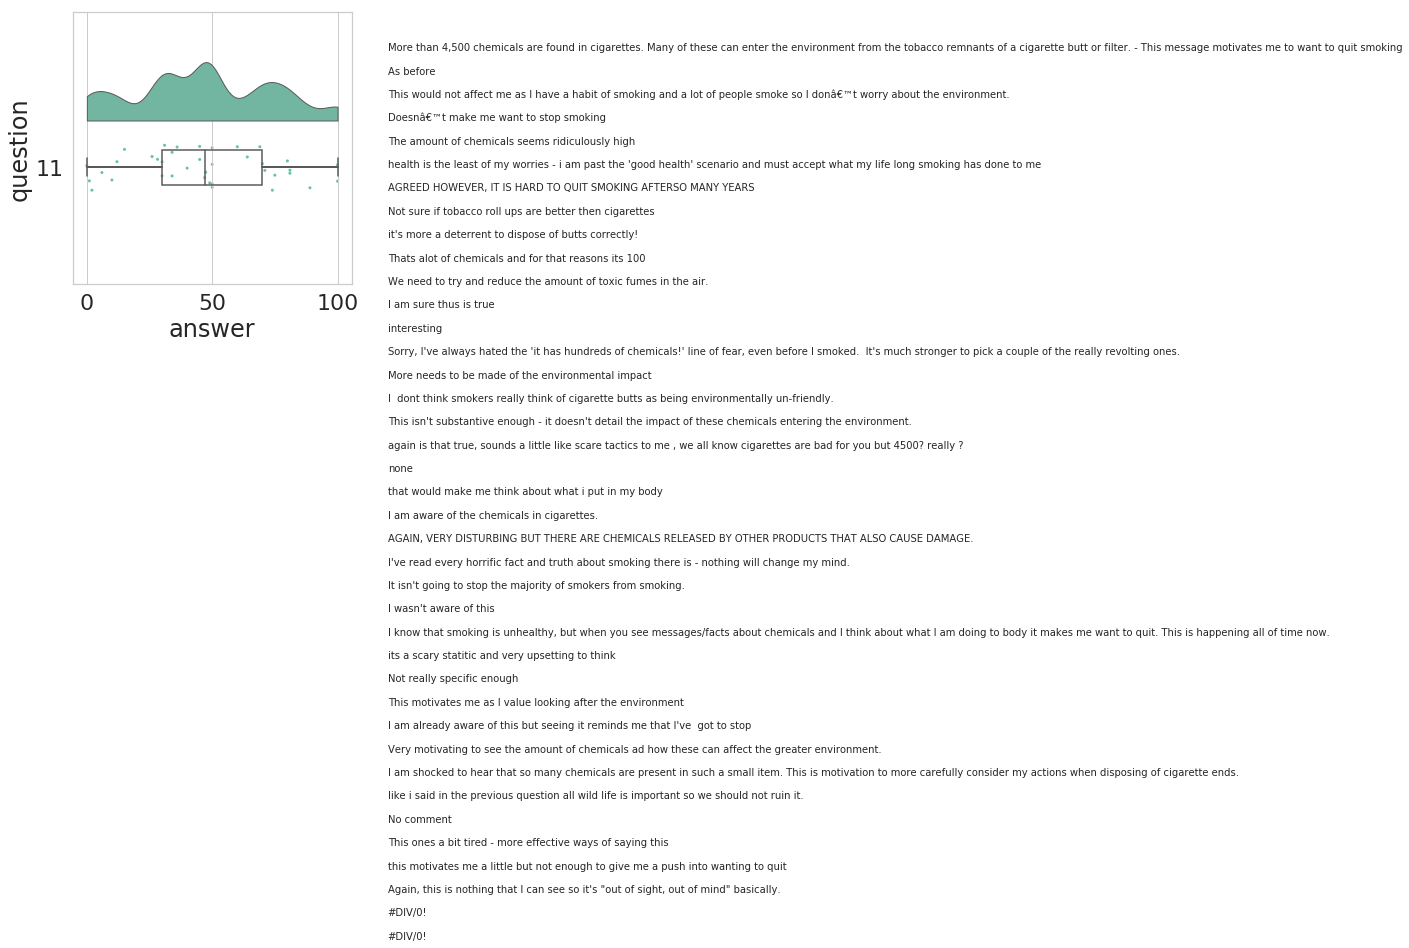

<Figure size 432x288 with 0 Axes>

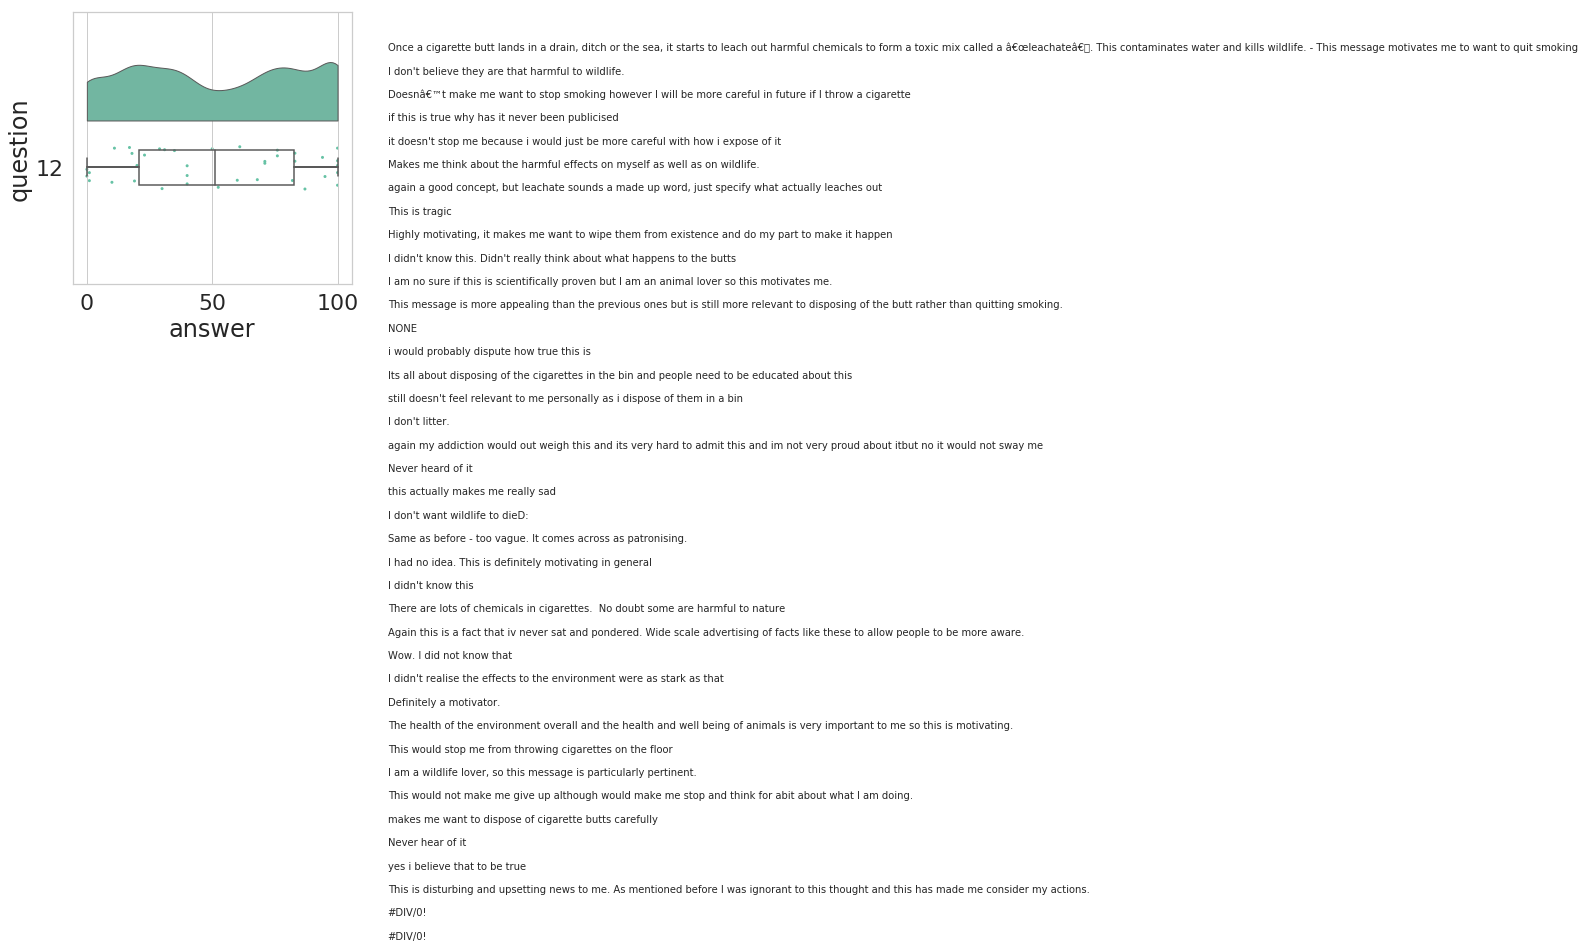

<Figure size 432x288 with 0 Axes>

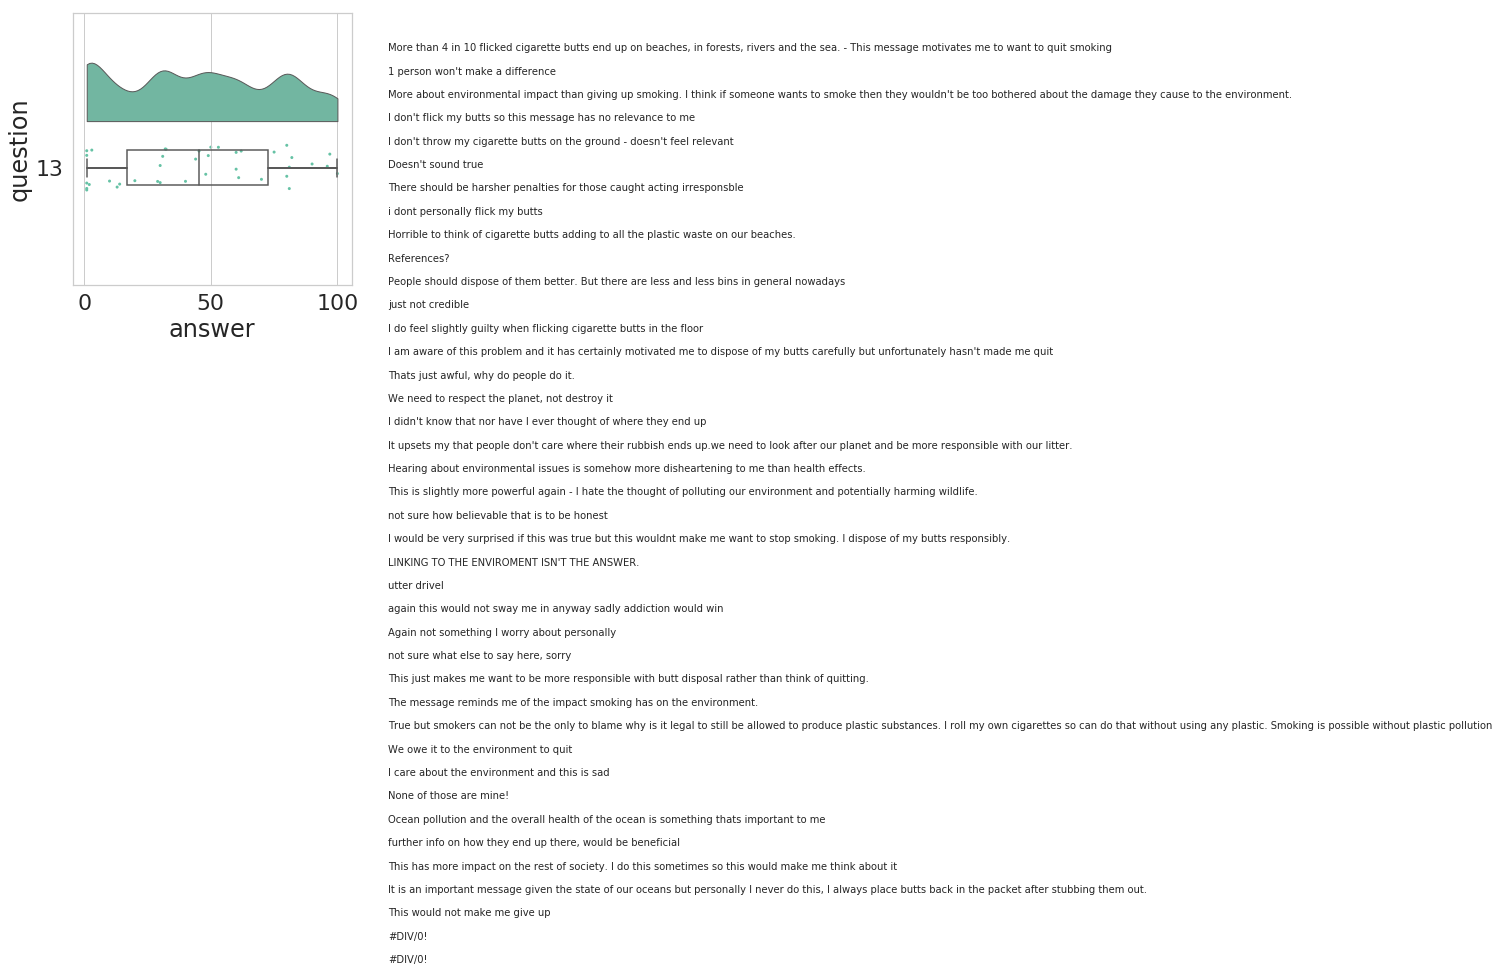

<Figure size 432x288 with 0 Axes>

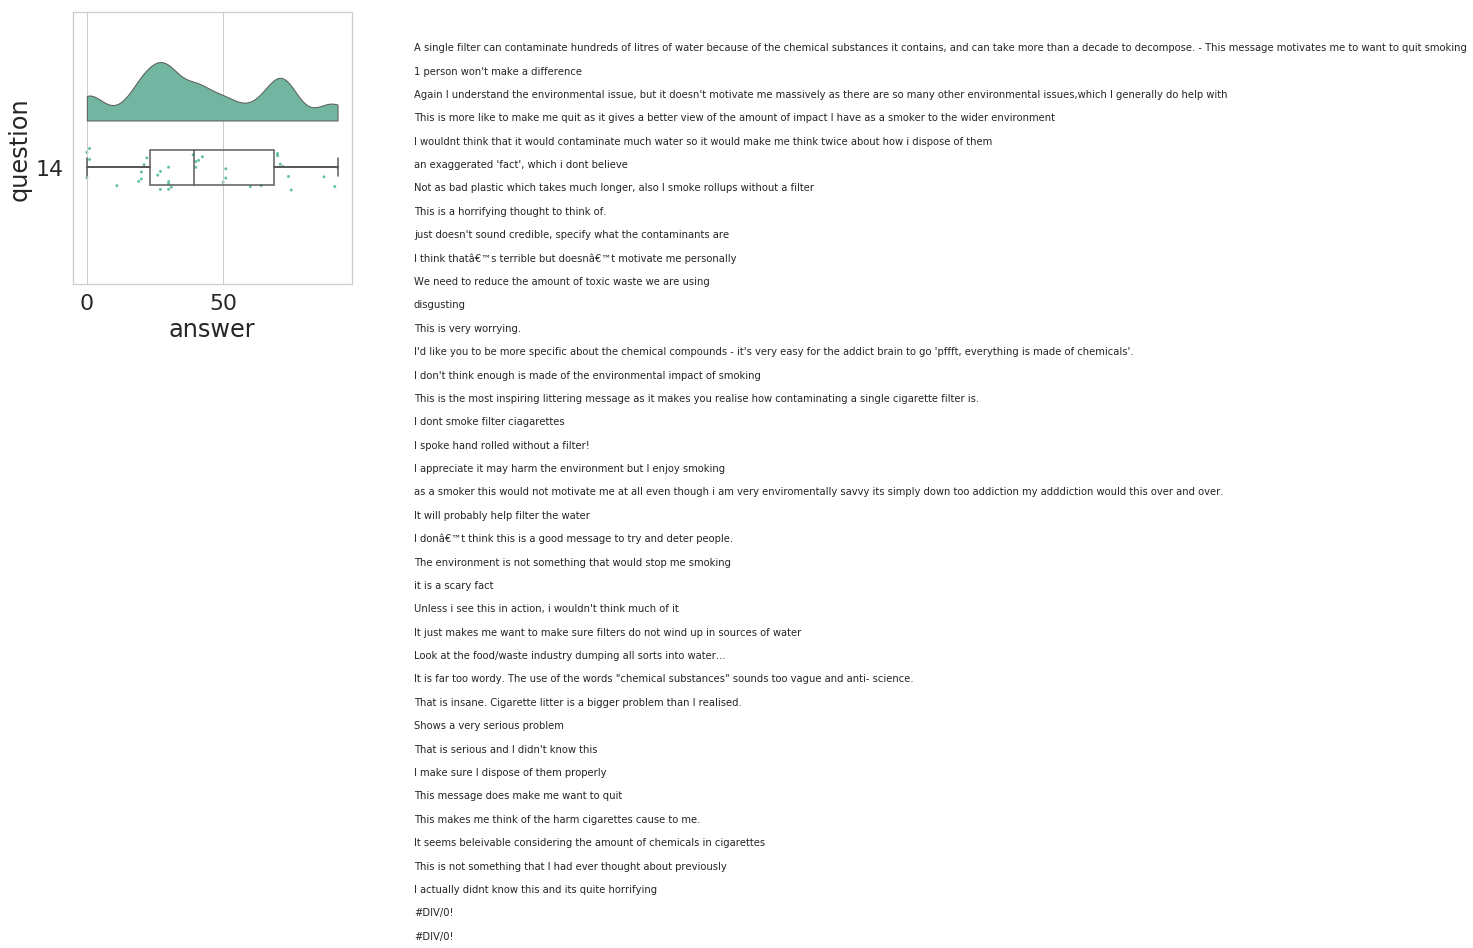

<Figure size 432x288 with 0 Axes>

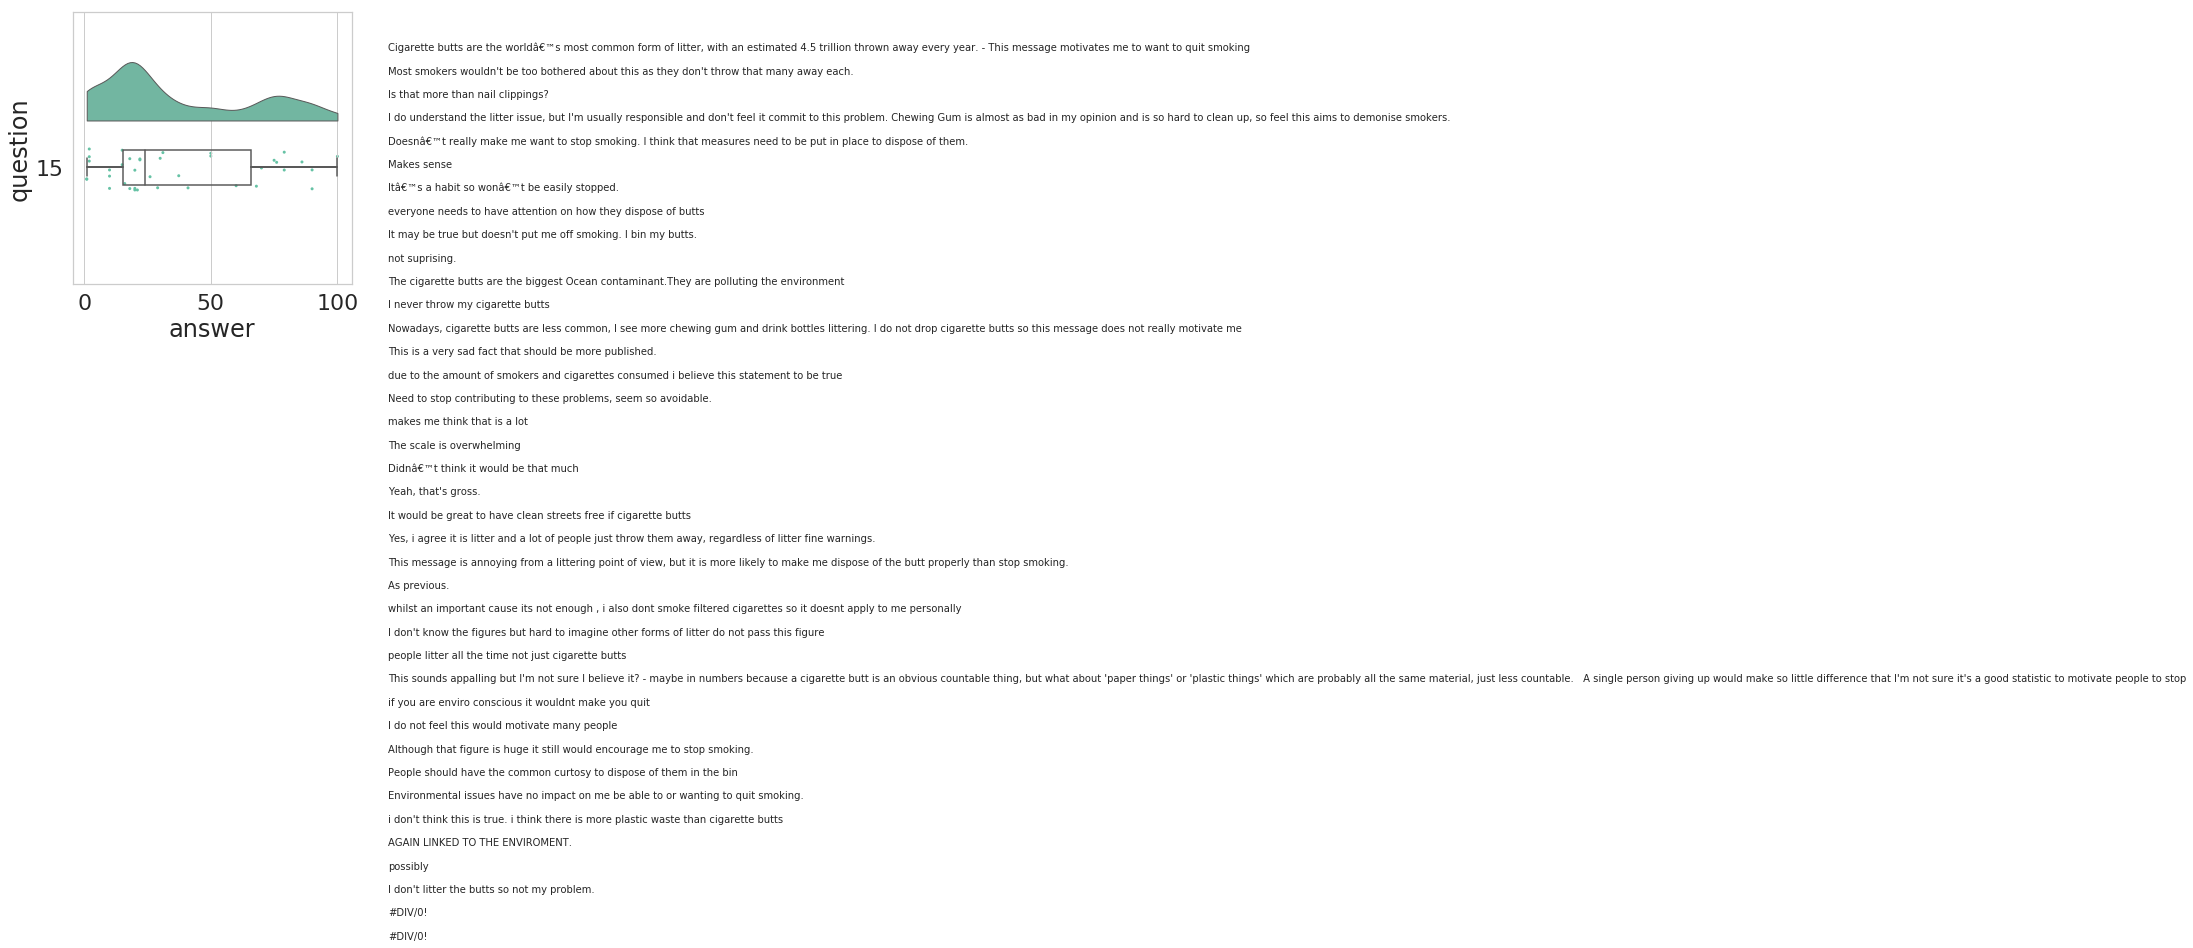

<Figure size 432x288 with 0 Axes>

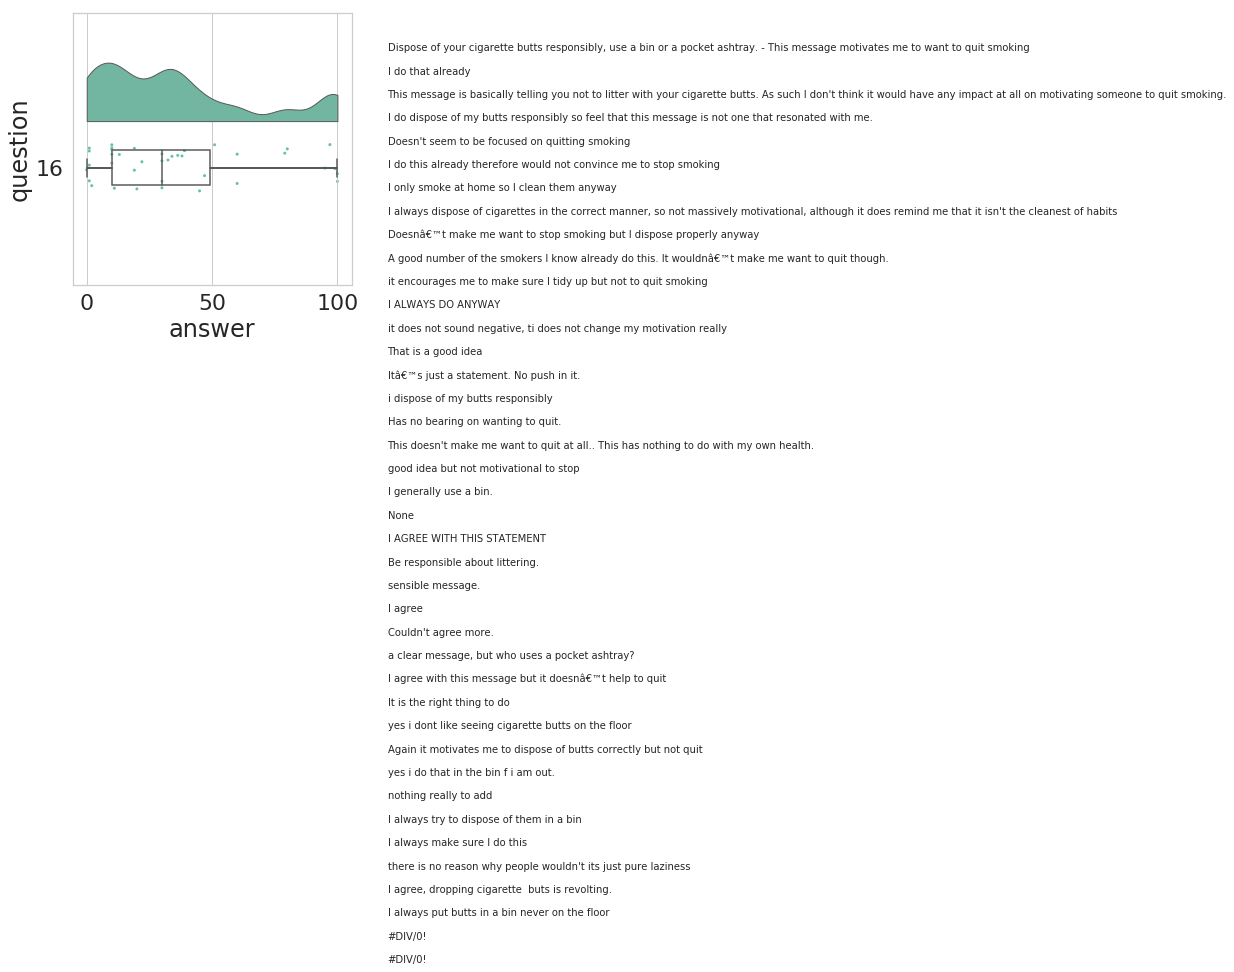

<Figure size 432x288 with 0 Axes>

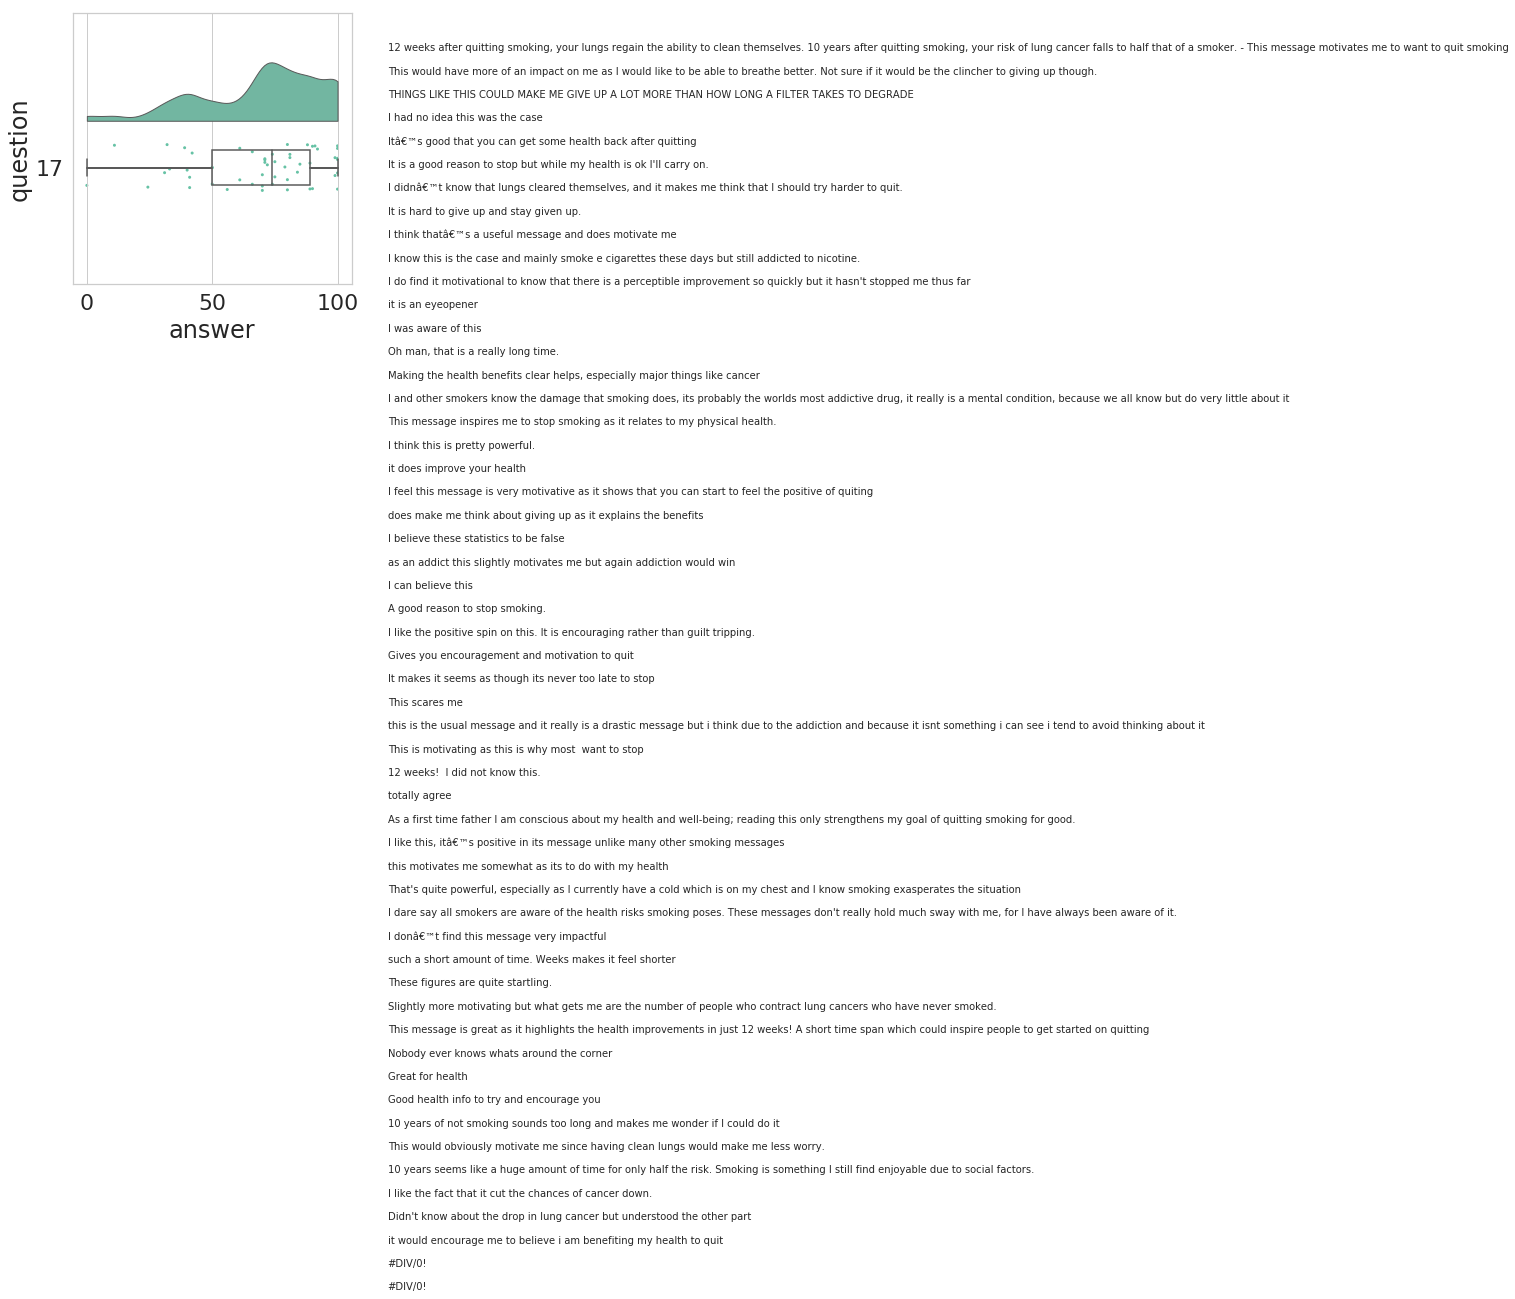

<Figure size 432x288 with 0 Axes>

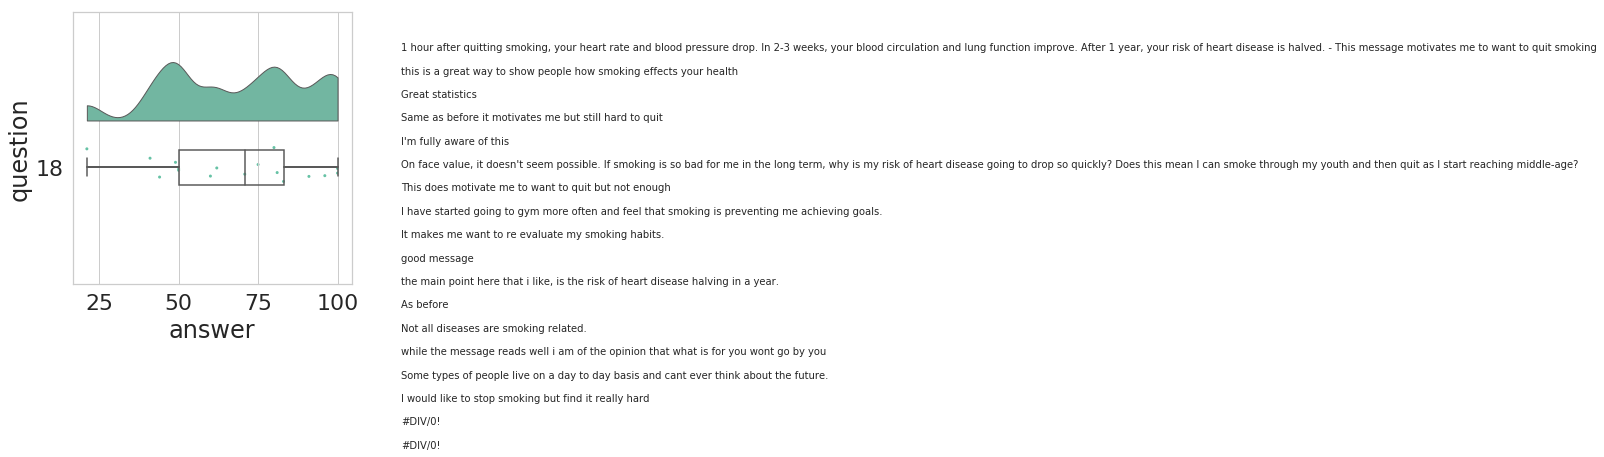

<Figure size 432x288 with 0 Axes>

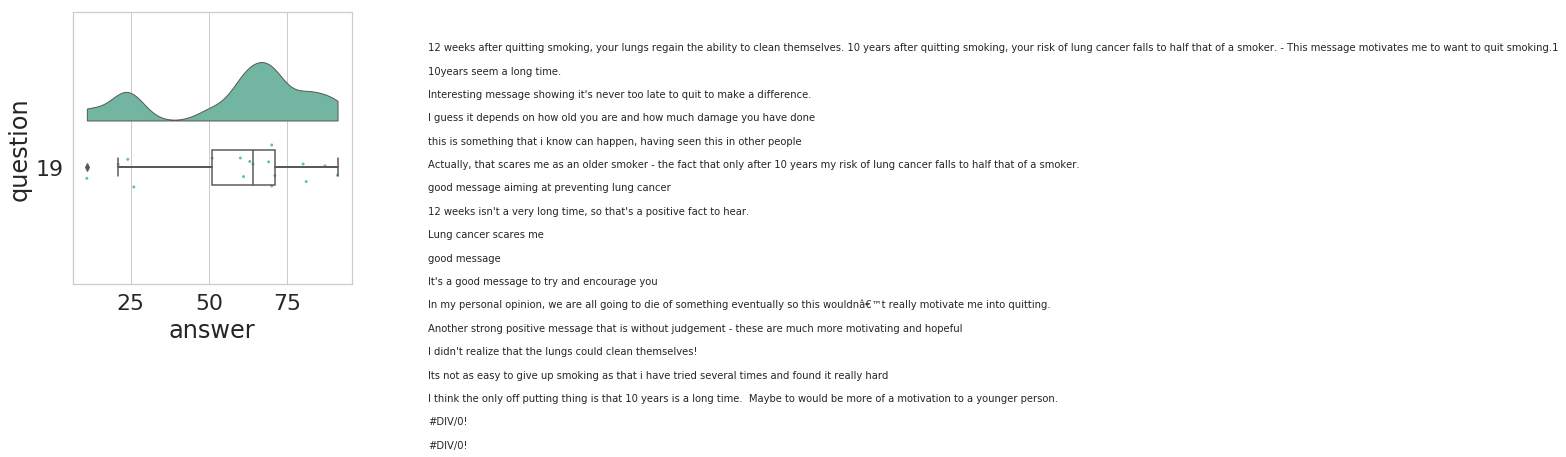

<Figure size 432x288 with 0 Axes>

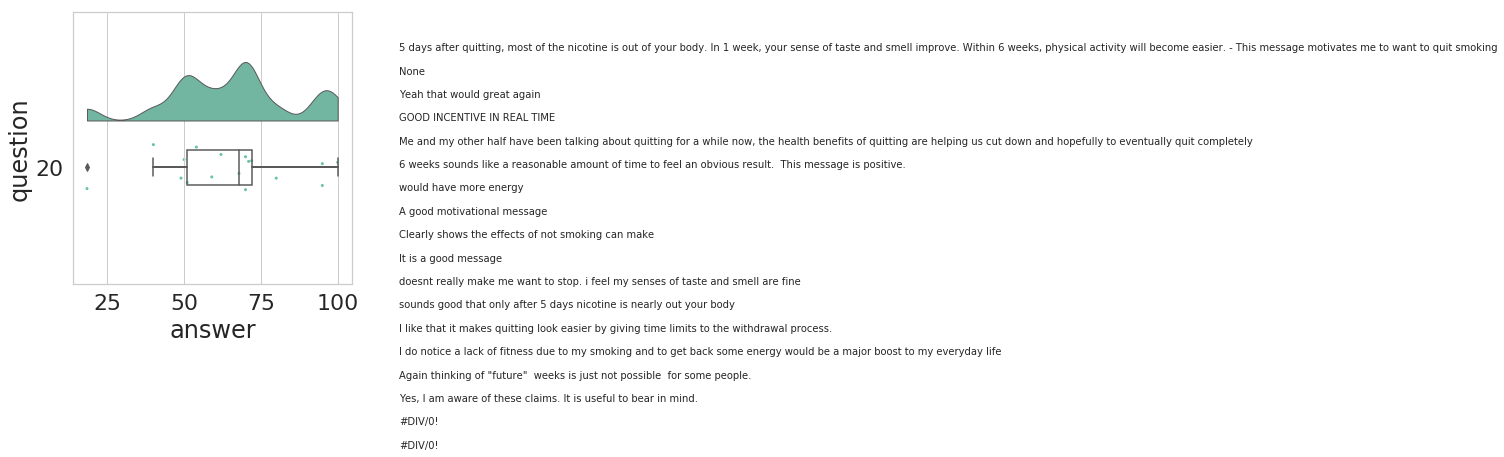

<Figure size 432x288 with 0 Axes>

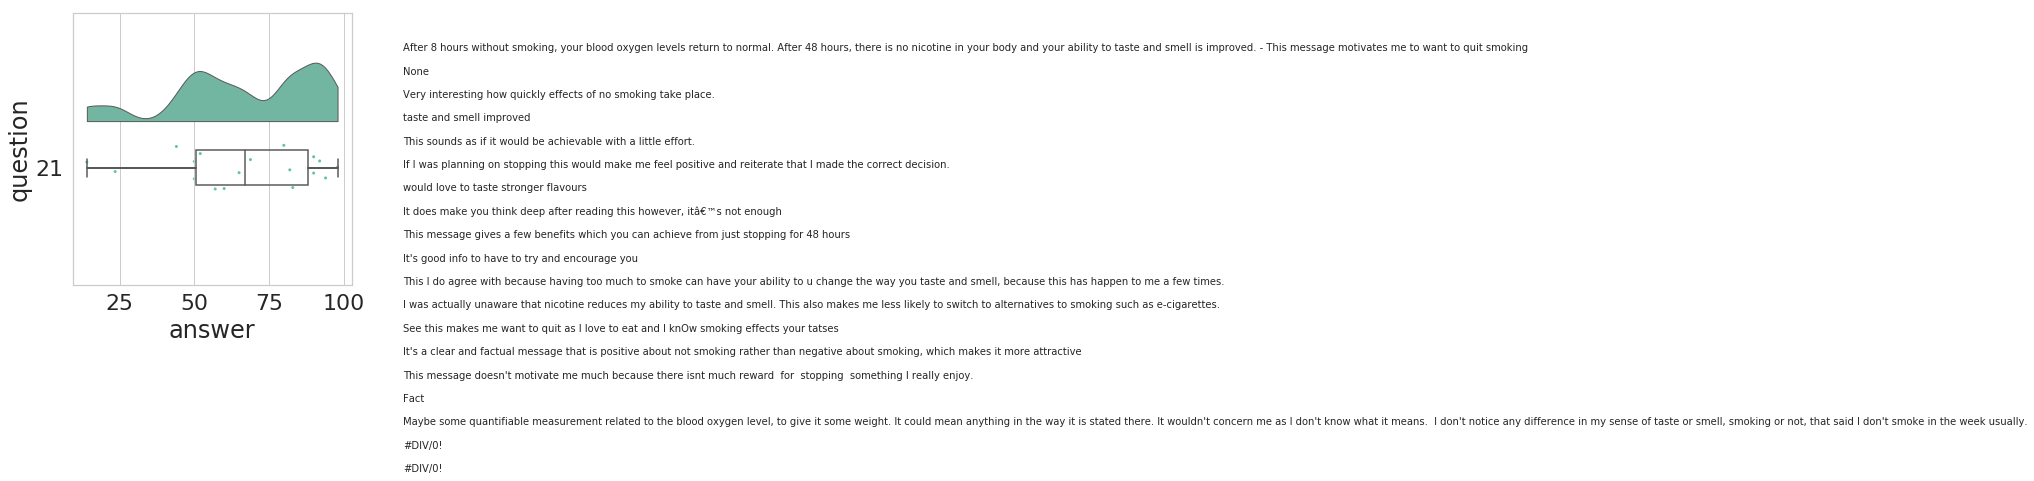

<Figure size 432x288 with 0 Axes>

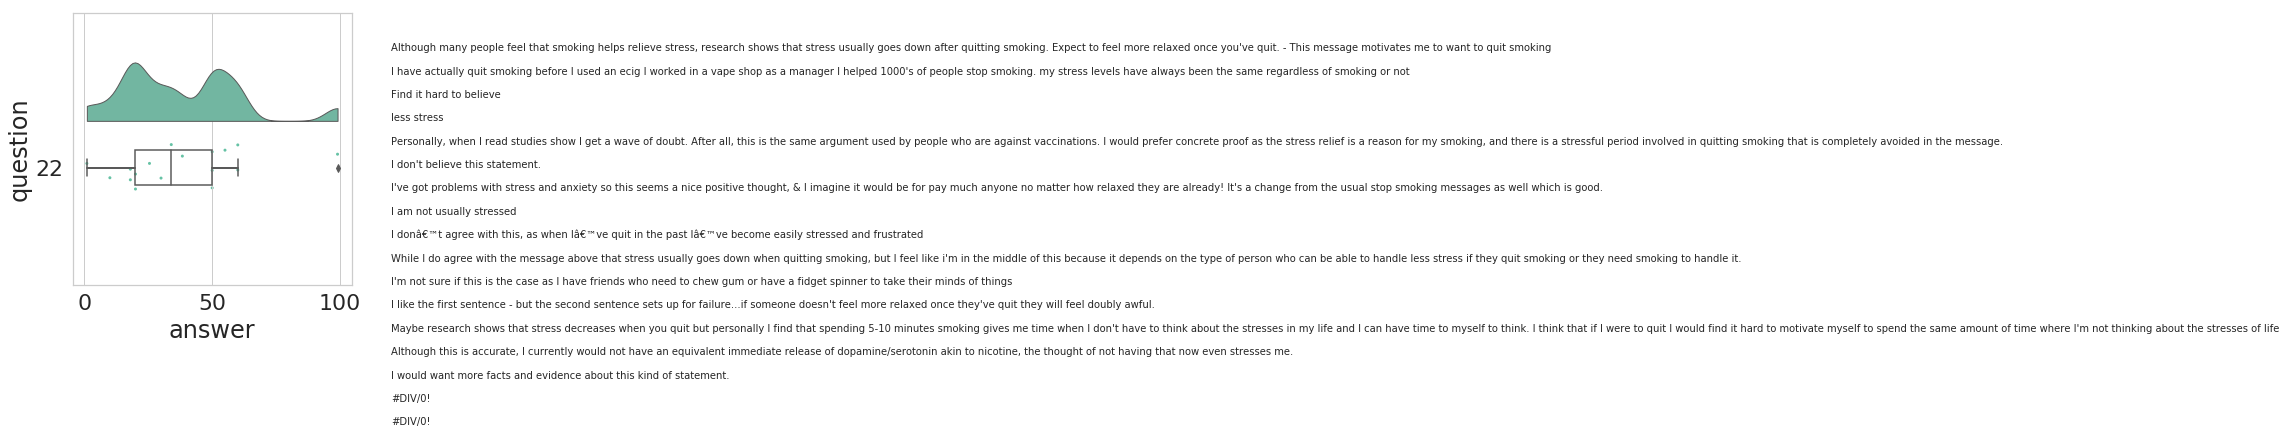

<Figure size 432x288 with 0 Axes>

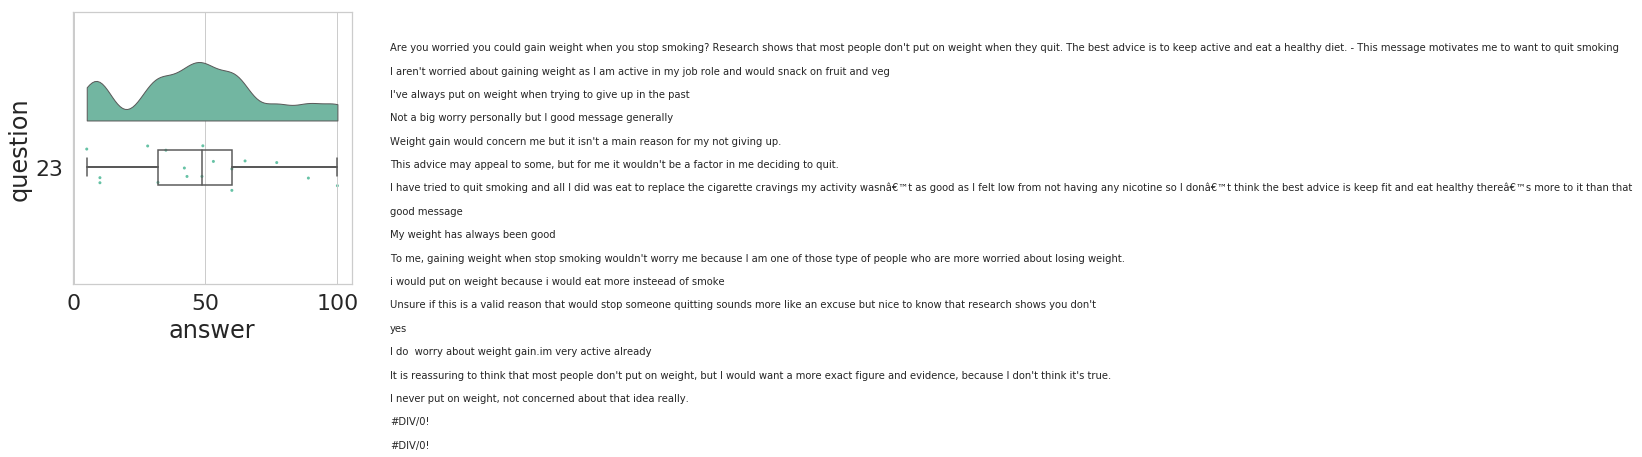

<Figure size 432x288 with 0 Axes>

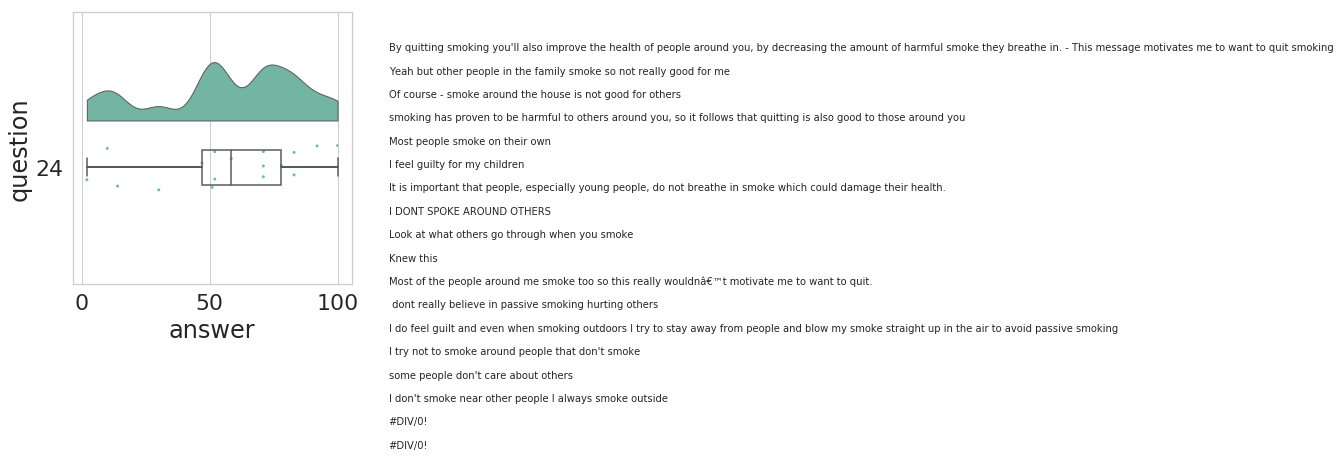

<Figure size 432x288 with 0 Axes>

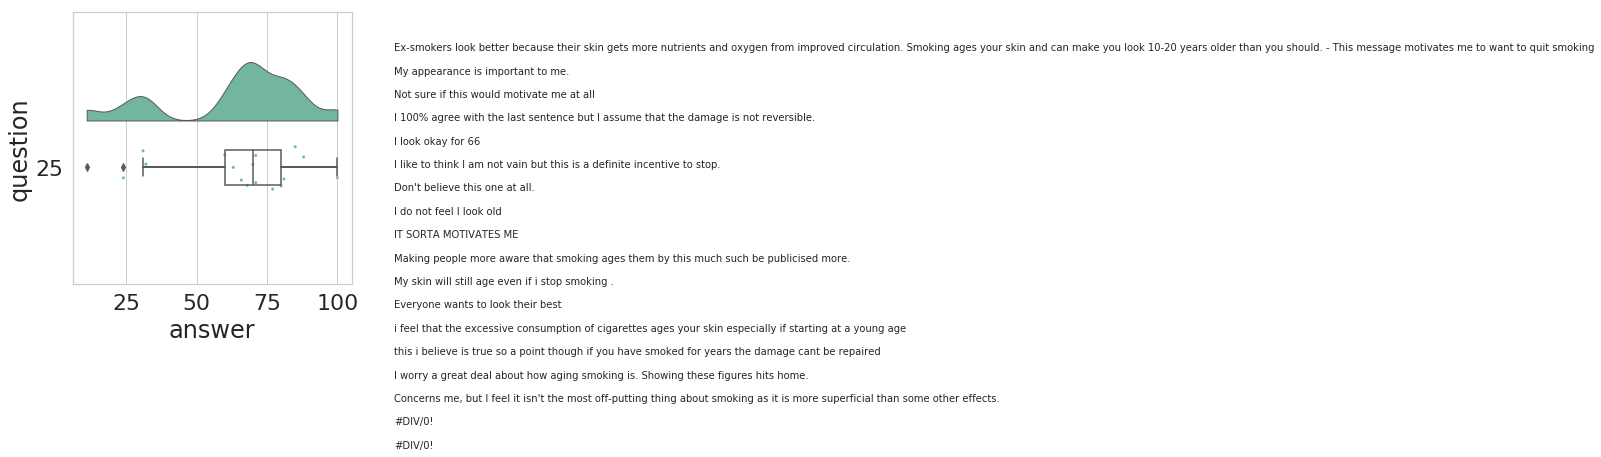

<Figure size 432x288 with 0 Axes>

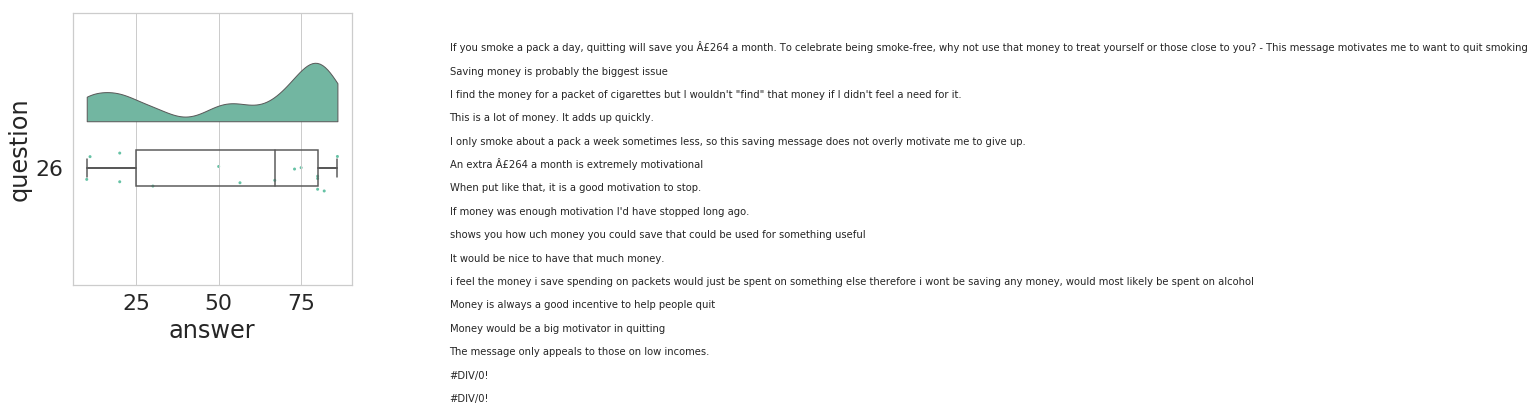

<Figure size 432x288 with 0 Axes>

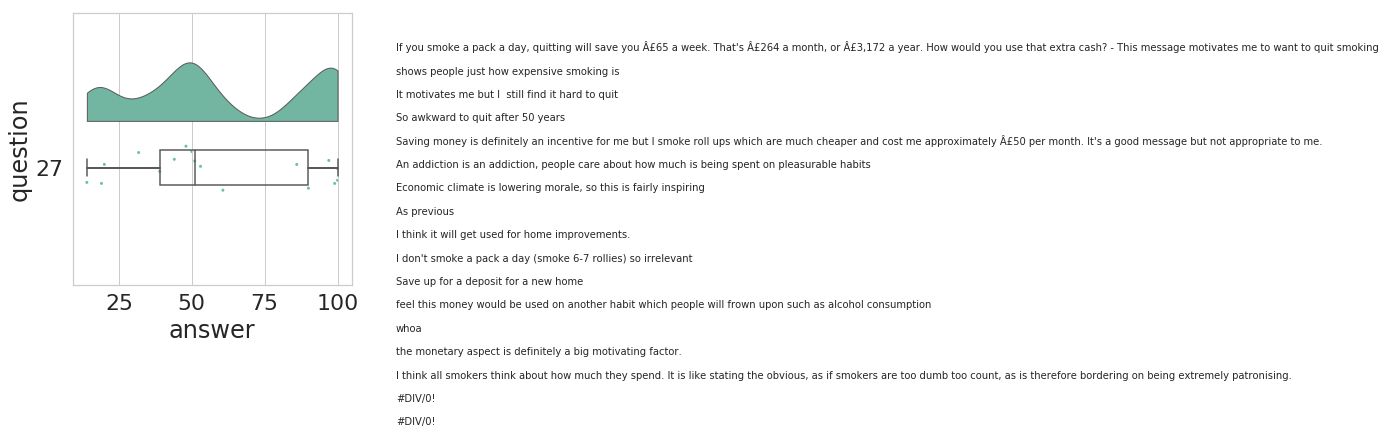

<Figure size 432x288 with 0 Axes>

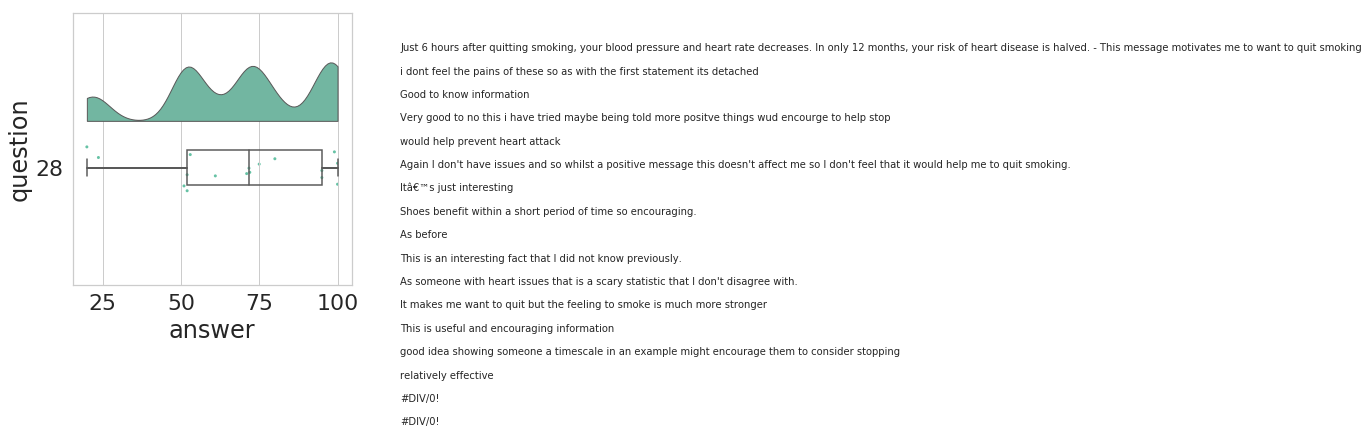

<Figure size 432x288 with 0 Axes>

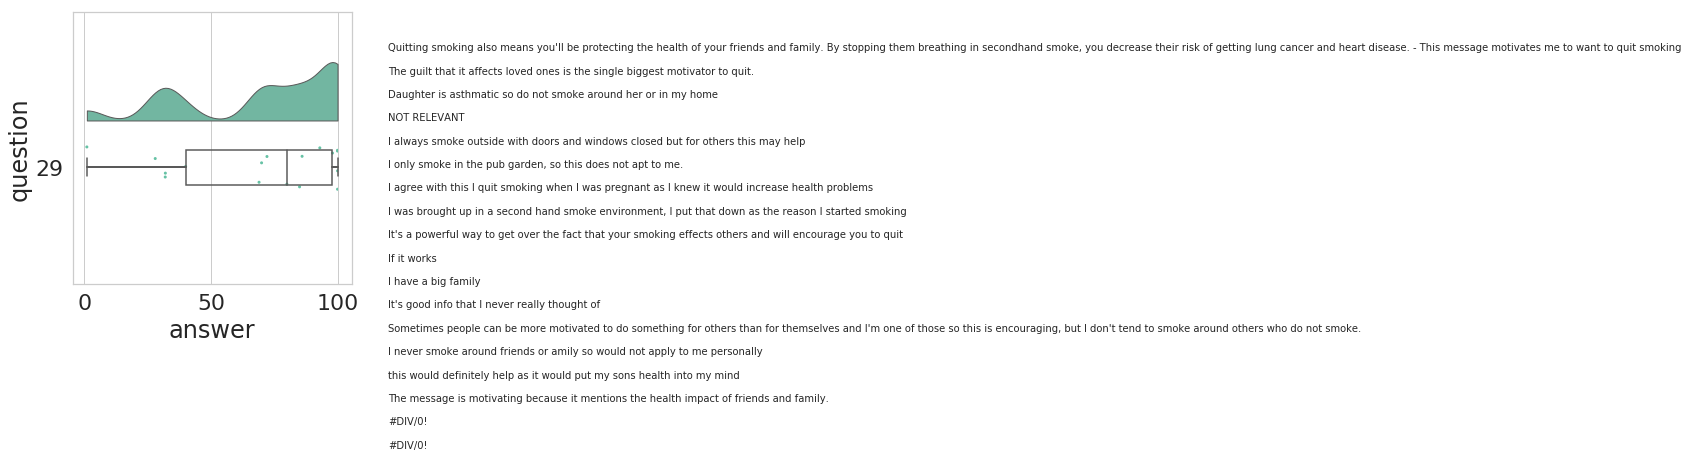

<Figure size 432x288 with 0 Axes>

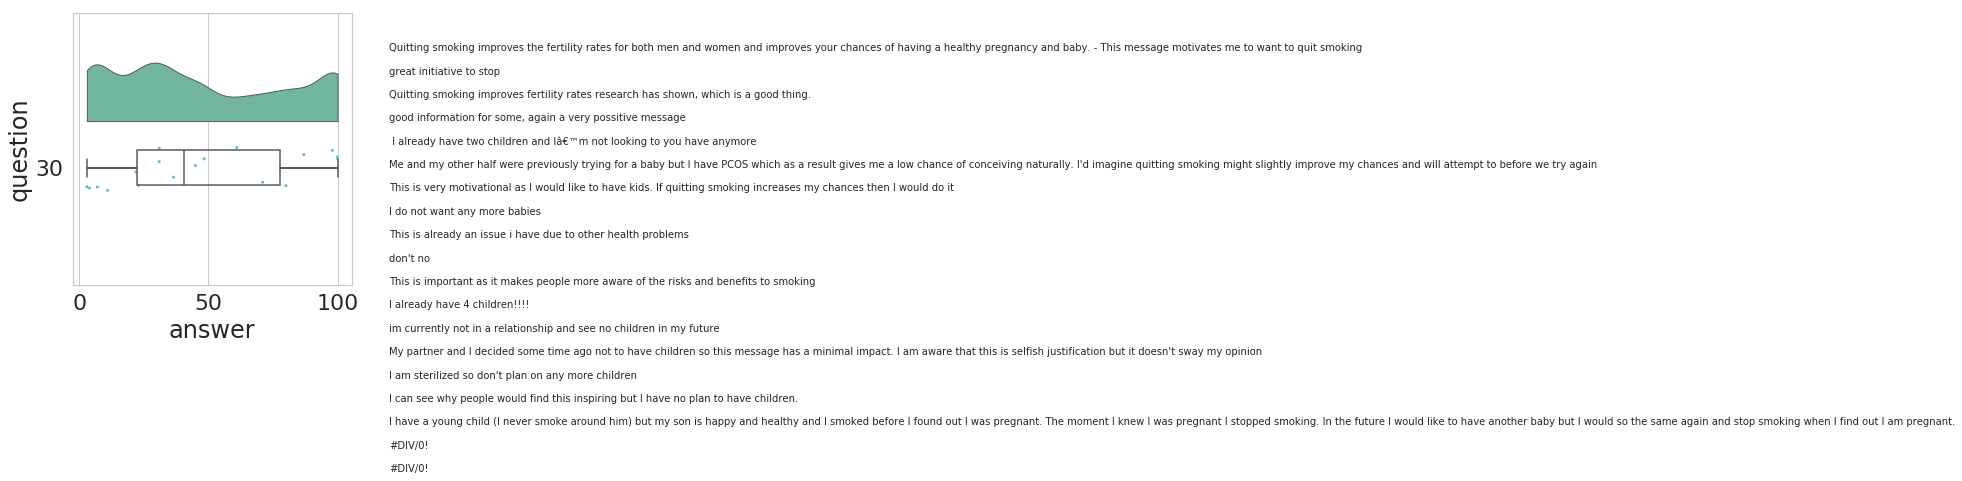

<Figure size 432x288 with 0 Axes>

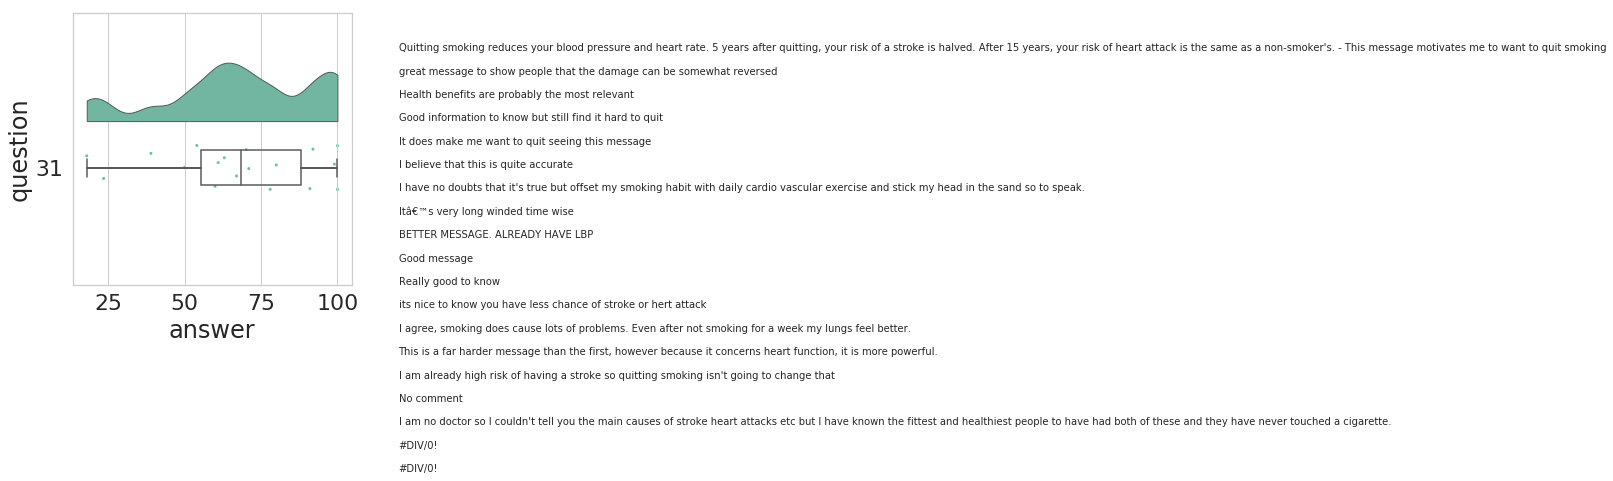

<Figure size 432x288 with 0 Axes>

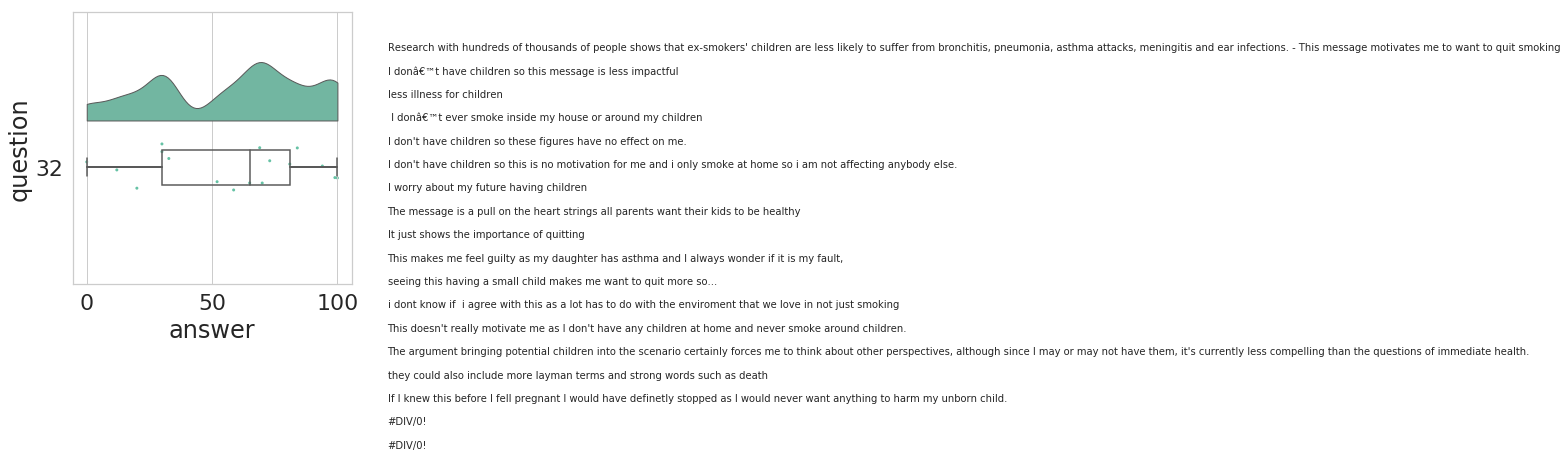

<Figure size 432x288 with 0 Axes>

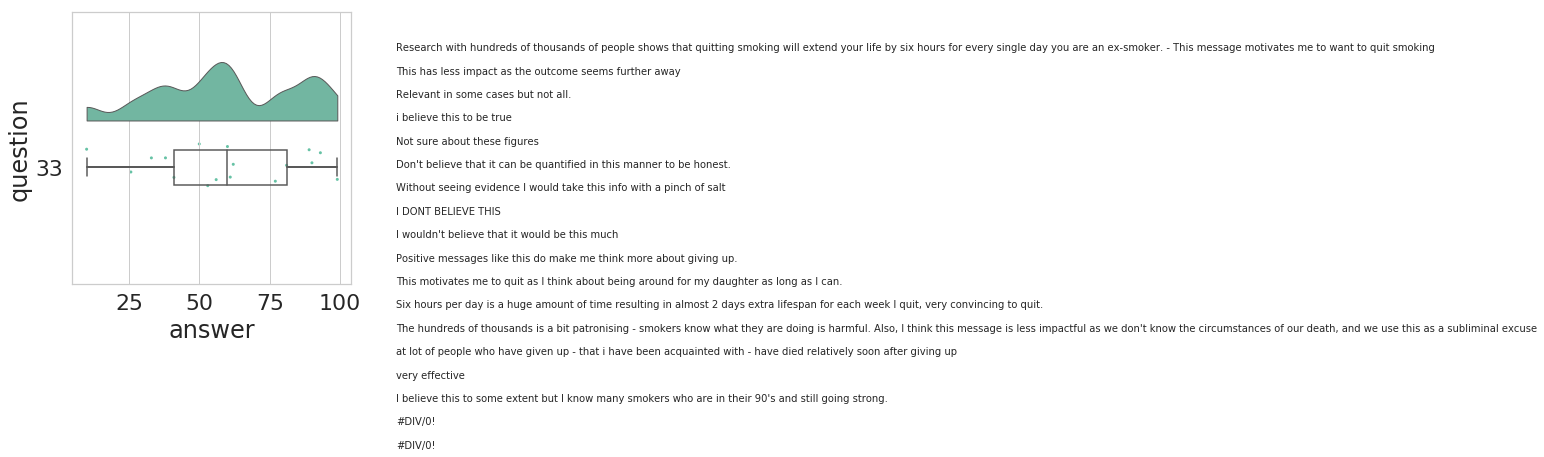

<Figure size 432x288 with 0 Axes>

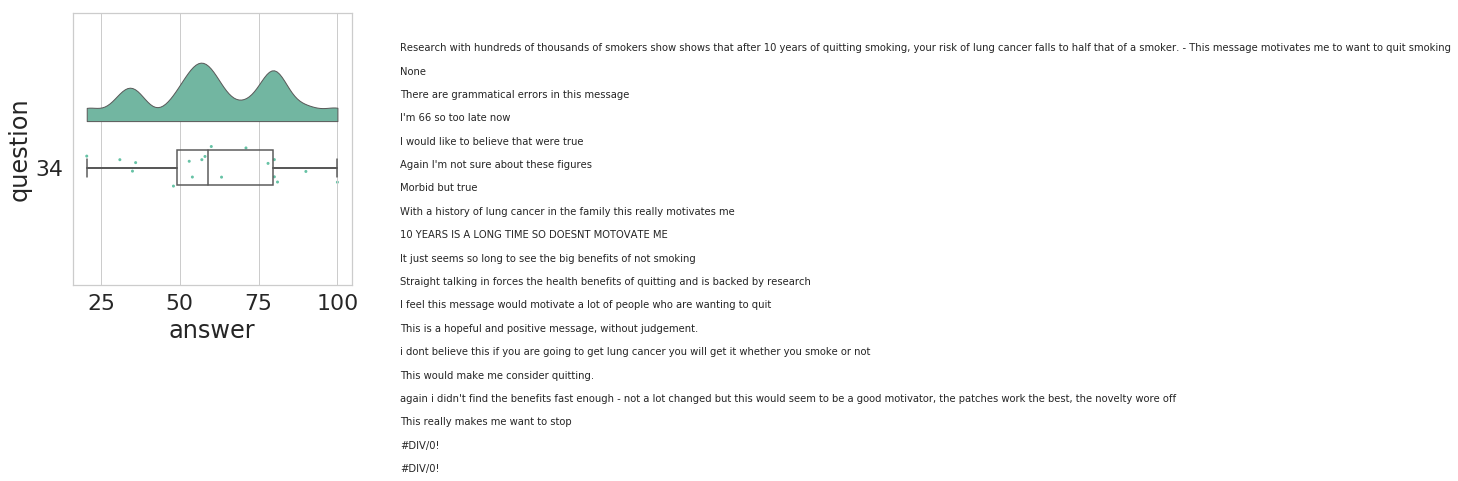

<Figure size 432x288 with 0 Axes>

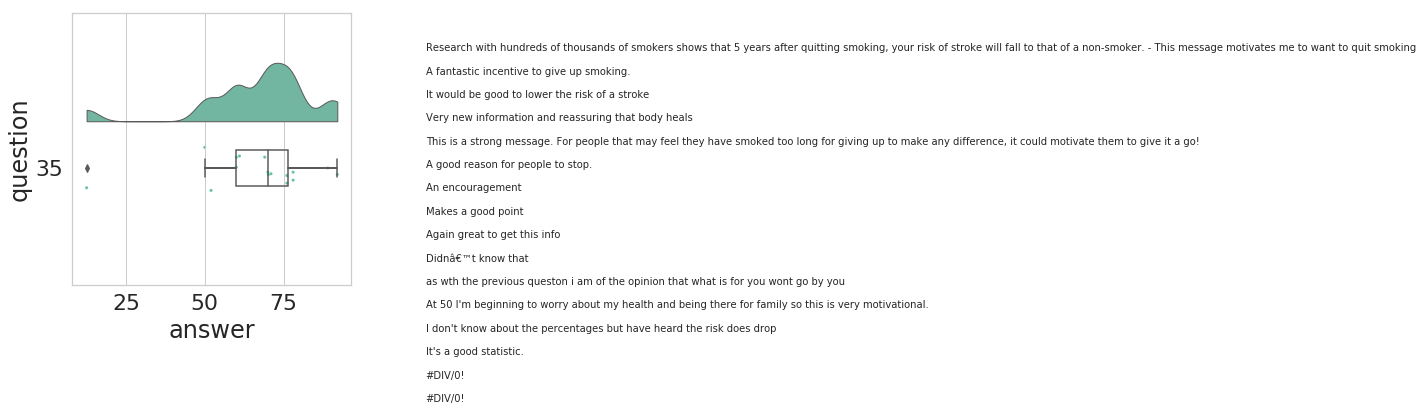

<Figure size 432x288 with 0 Axes>

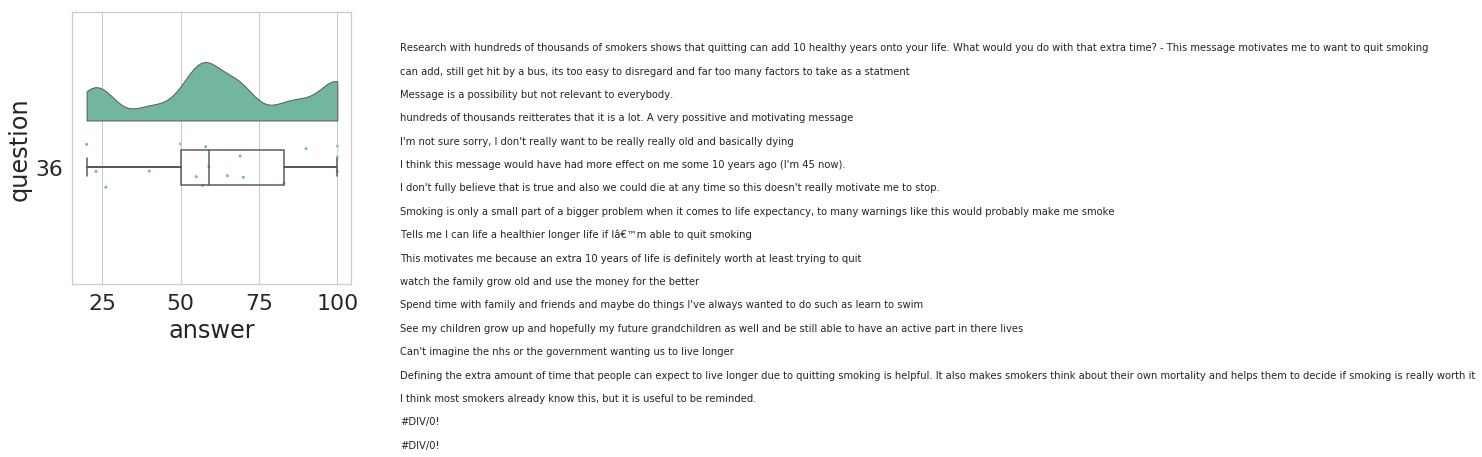

<Figure size 432x288 with 0 Axes>

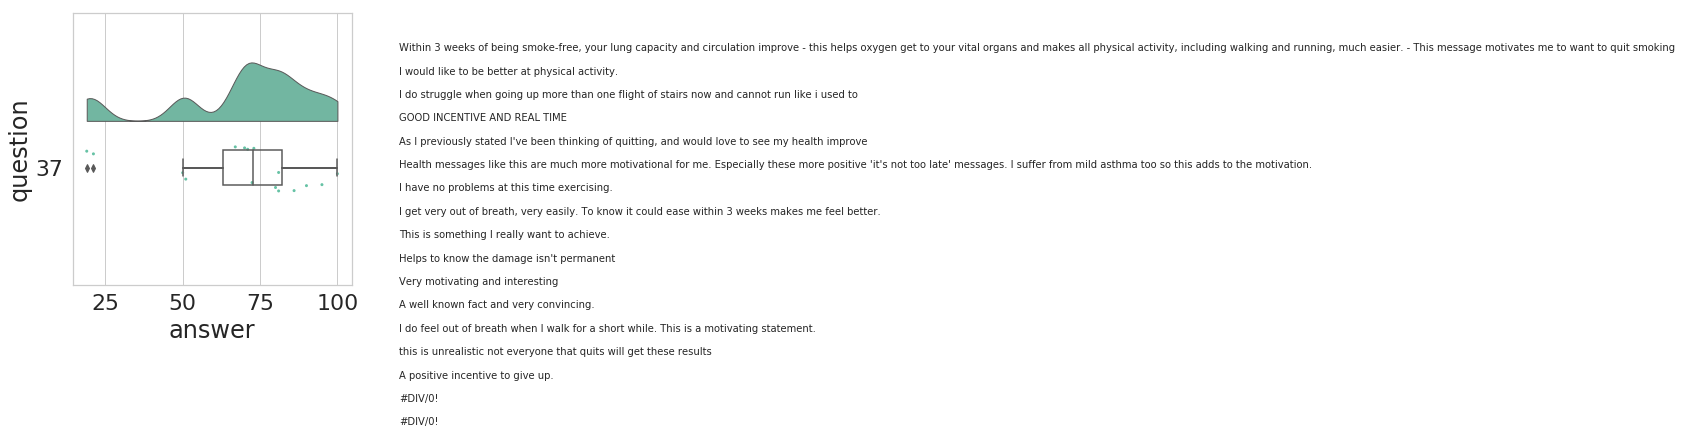

<Figure size 432x288 with 0 Axes>

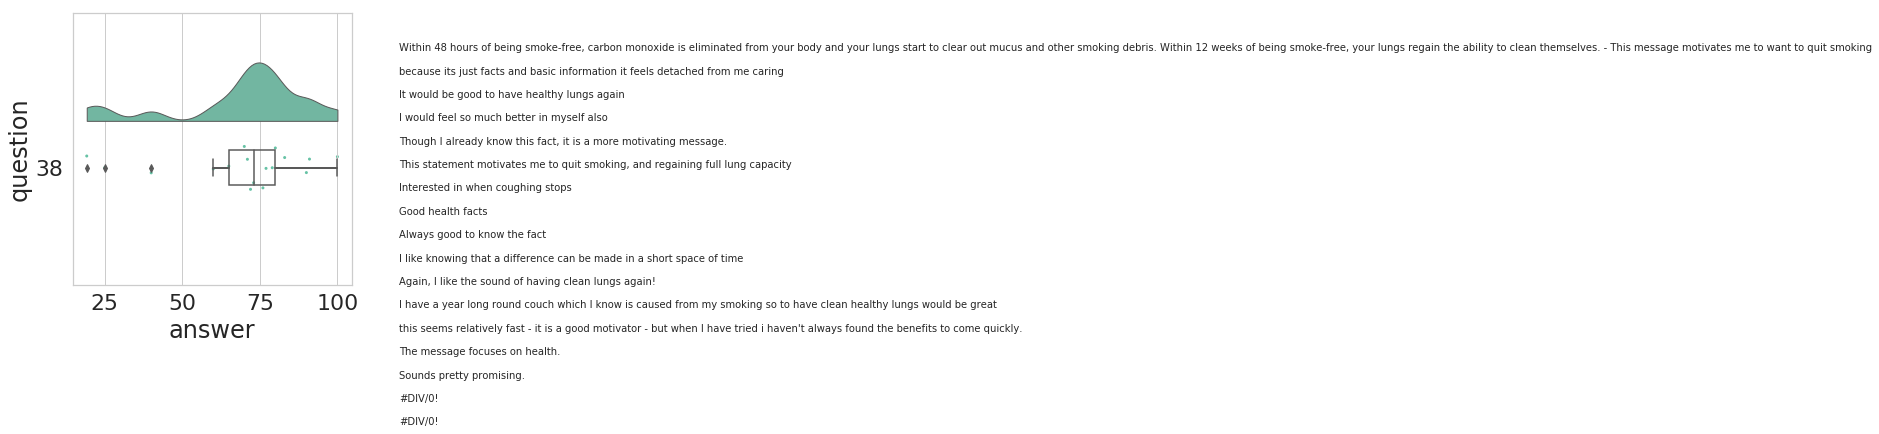

<Figure size 432x288 with 0 Axes>

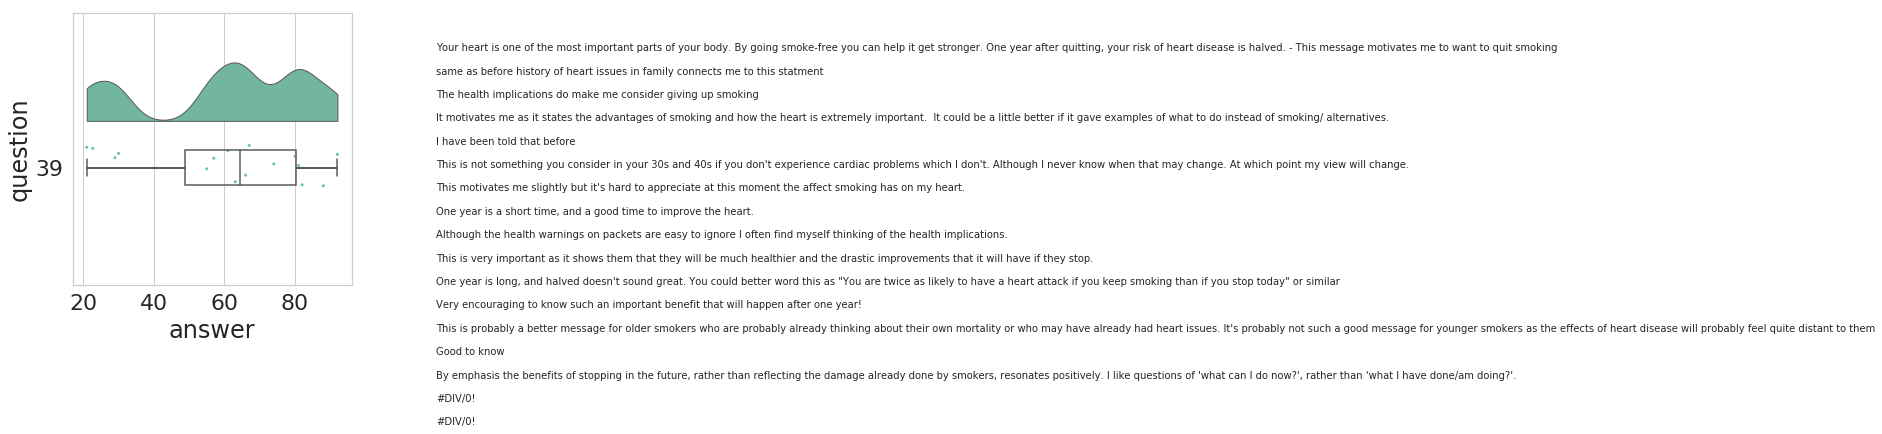

<Figure size 432x288 with 0 Axes>

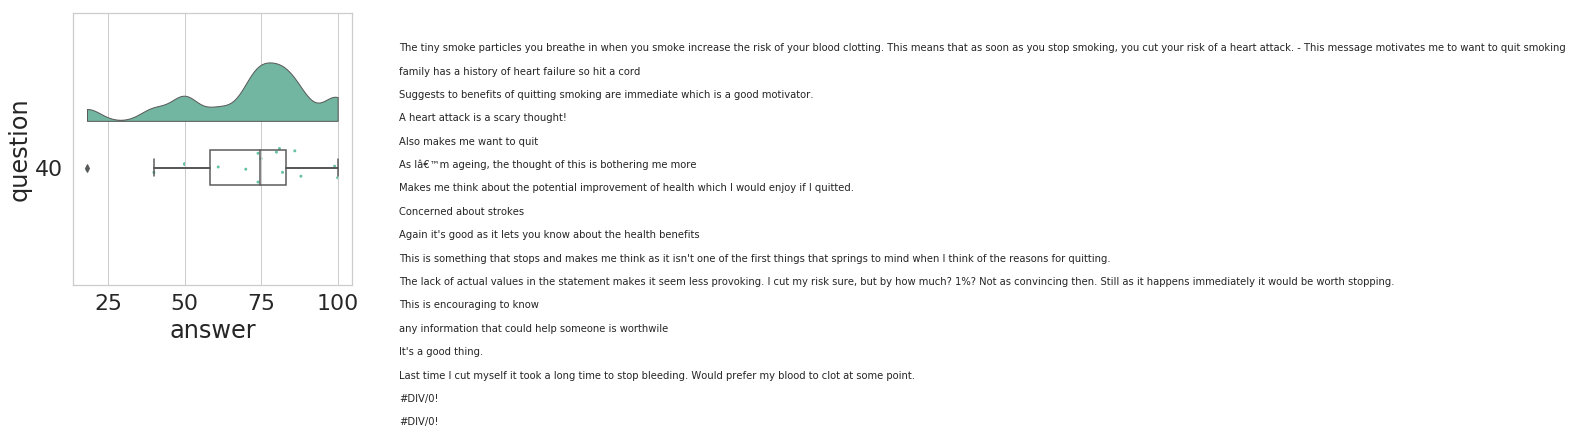

<Figure size 432x288 with 0 Axes>

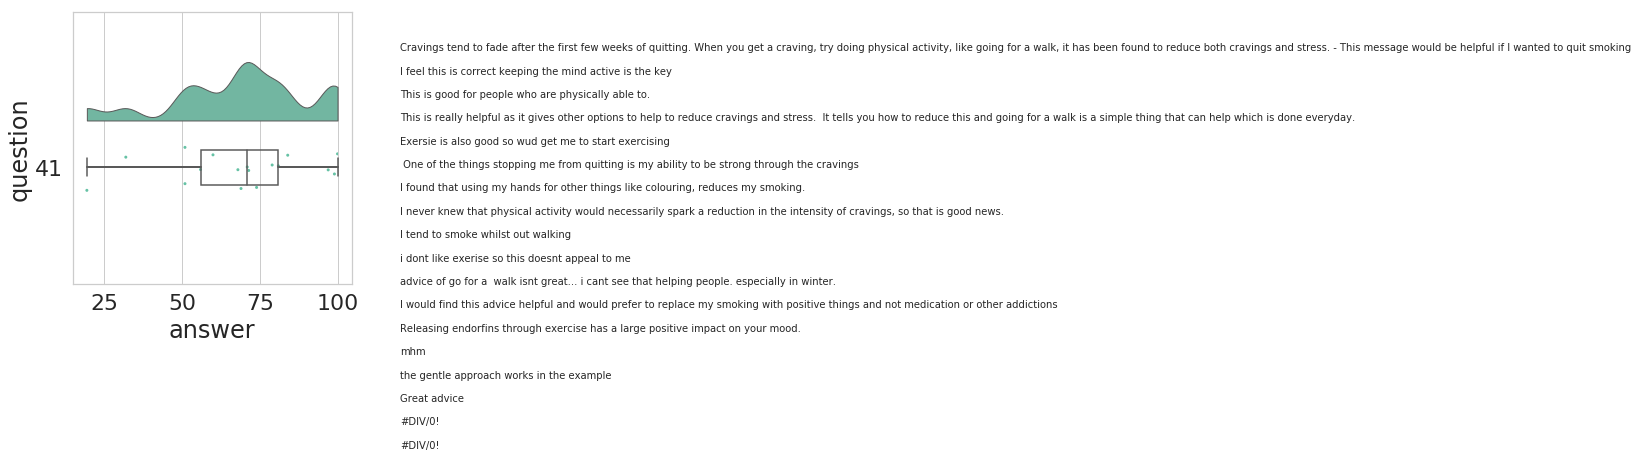

<Figure size 432x288 with 0 Axes>

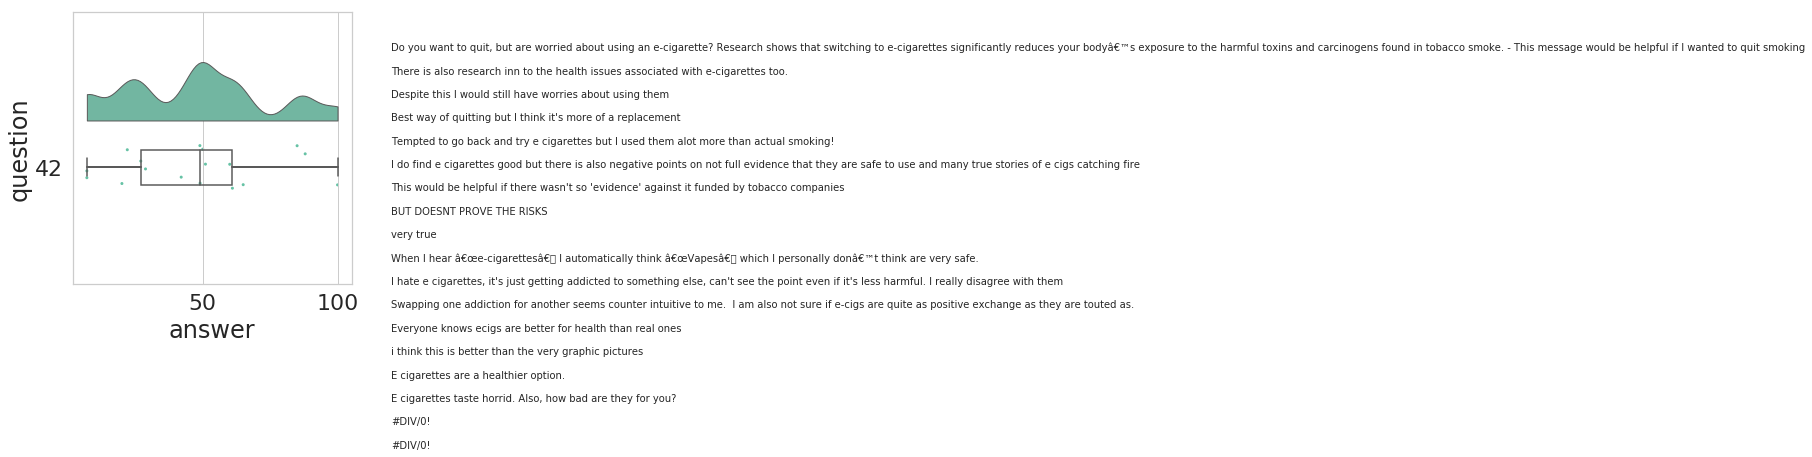

<Figure size 432x288 with 0 Axes>

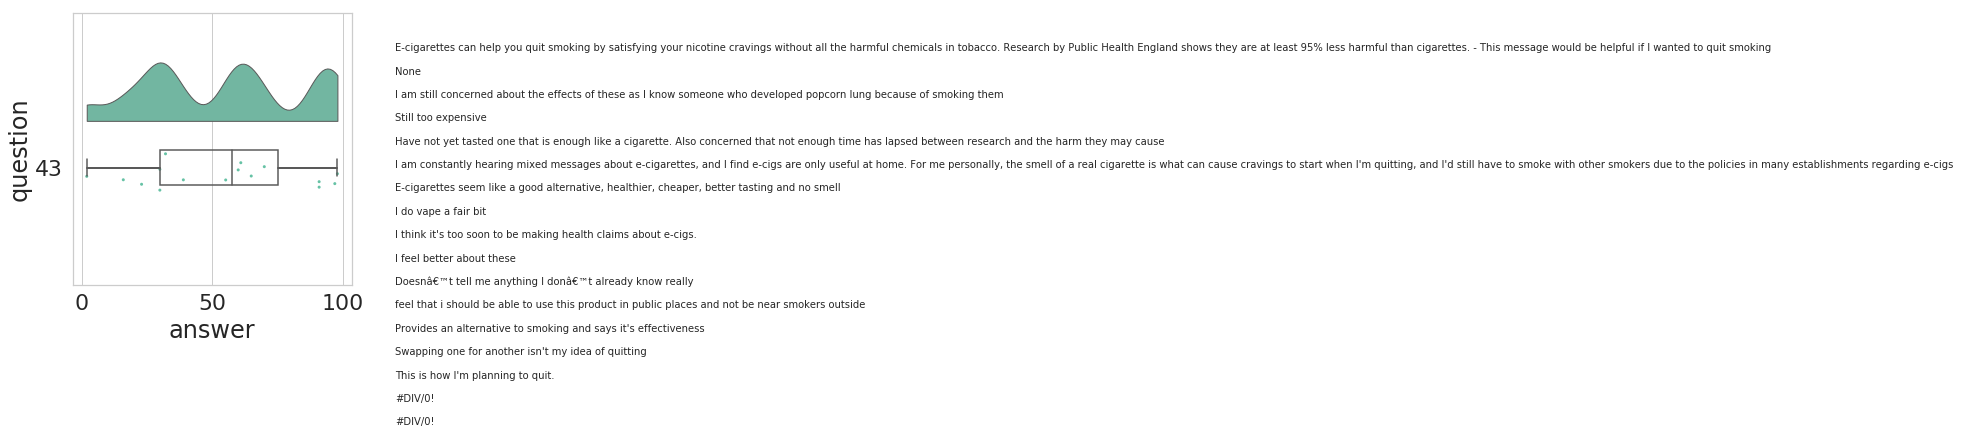

<Figure size 432x288 with 0 Axes>

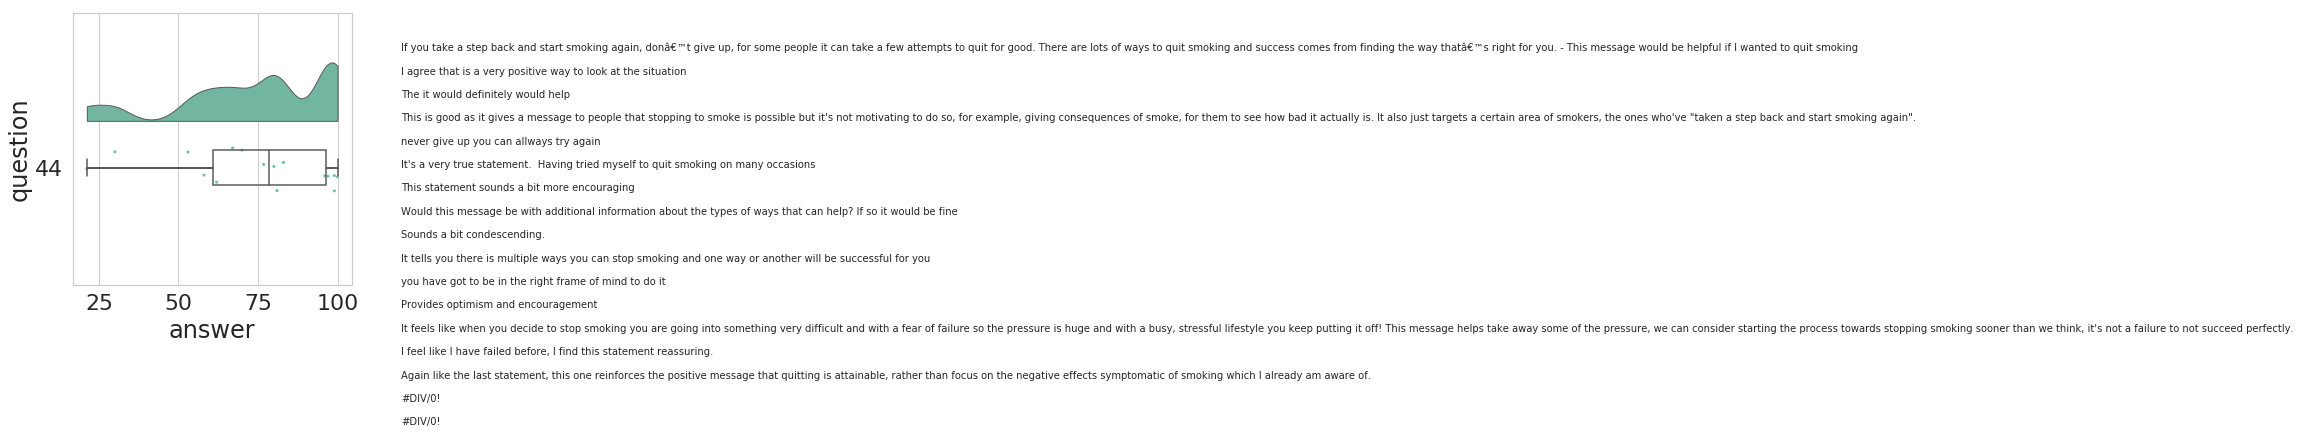

<Figure size 432x288 with 0 Axes>

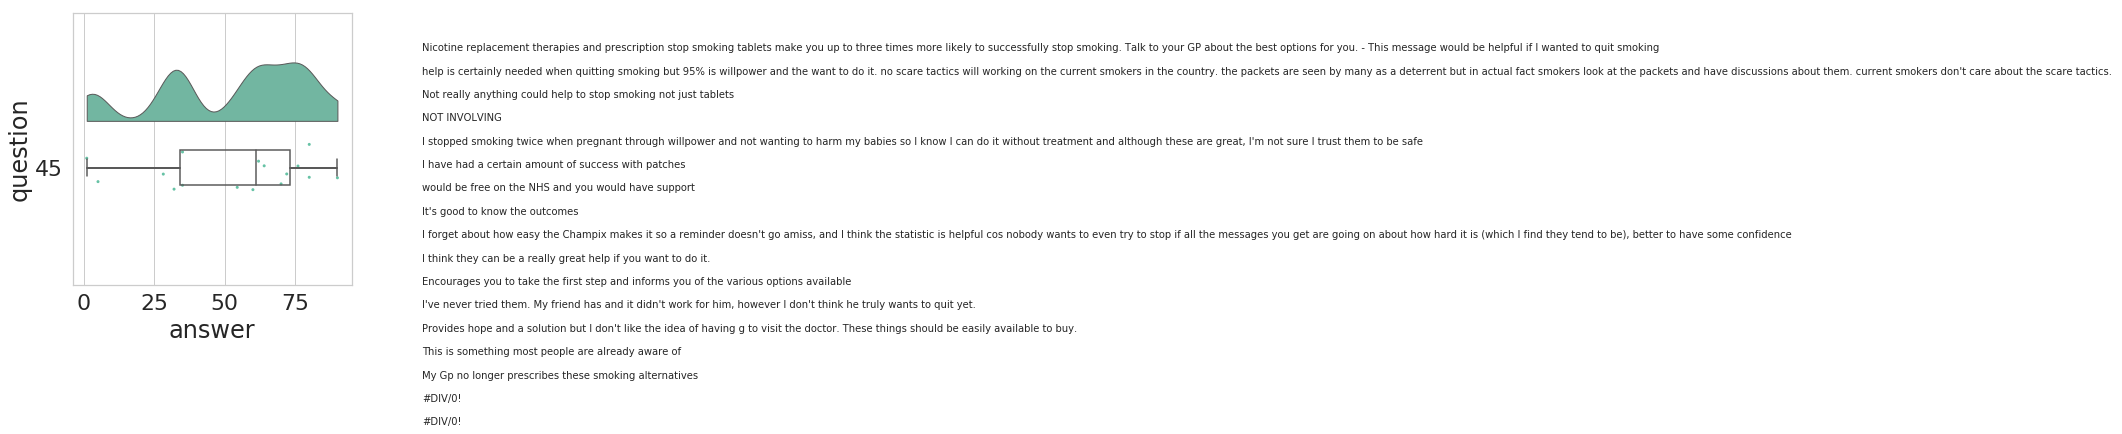

<Figure size 432x288 with 0 Axes>

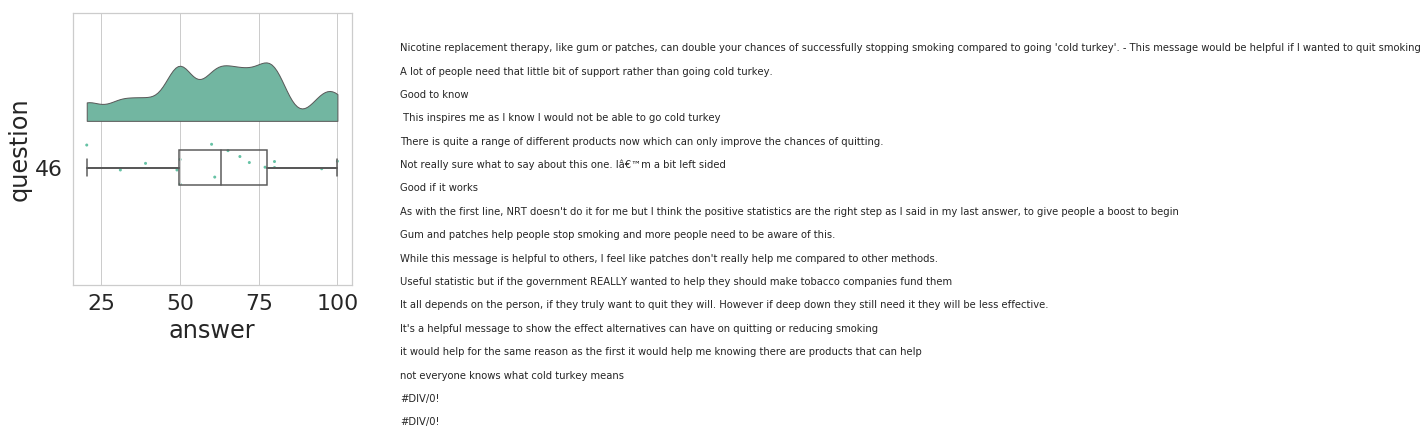

<Figure size 432x288 with 0 Axes>

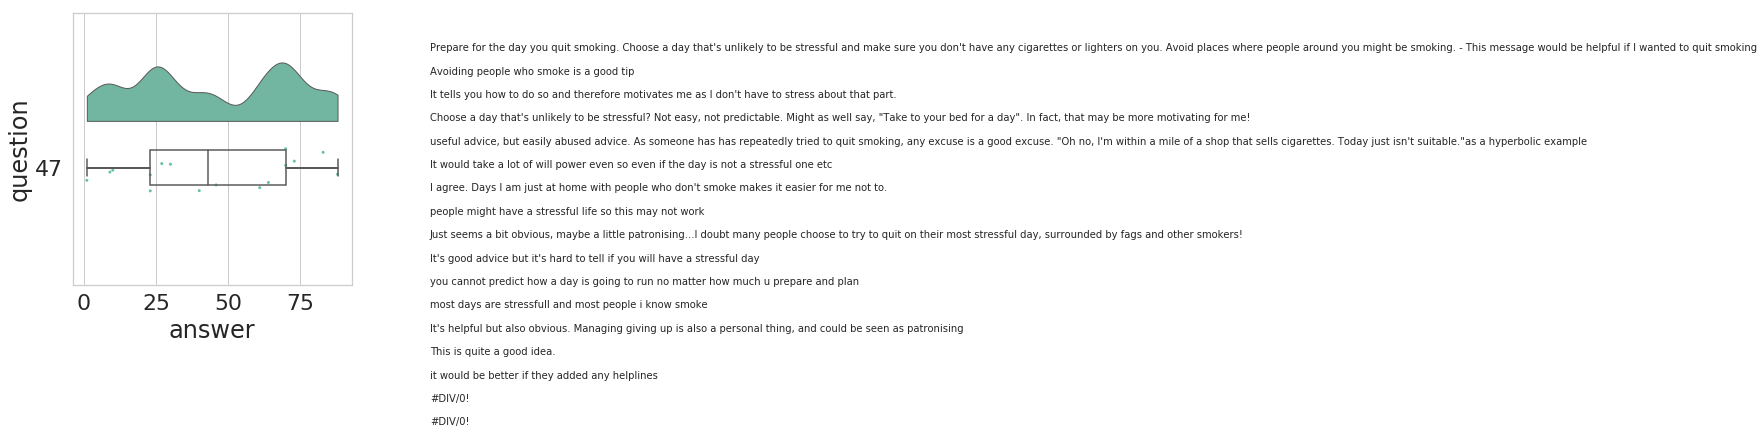

<Figure size 432x288 with 0 Axes>

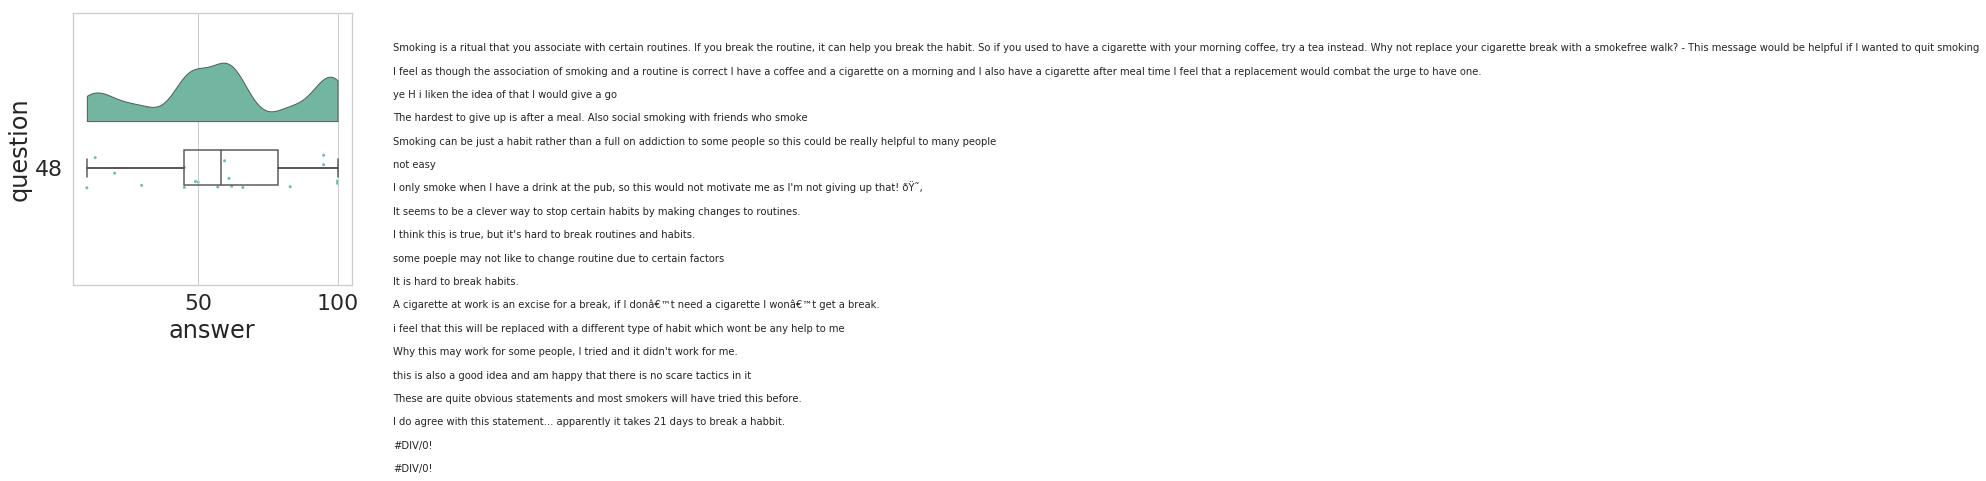

<Figure size 432x288 with 0 Axes>

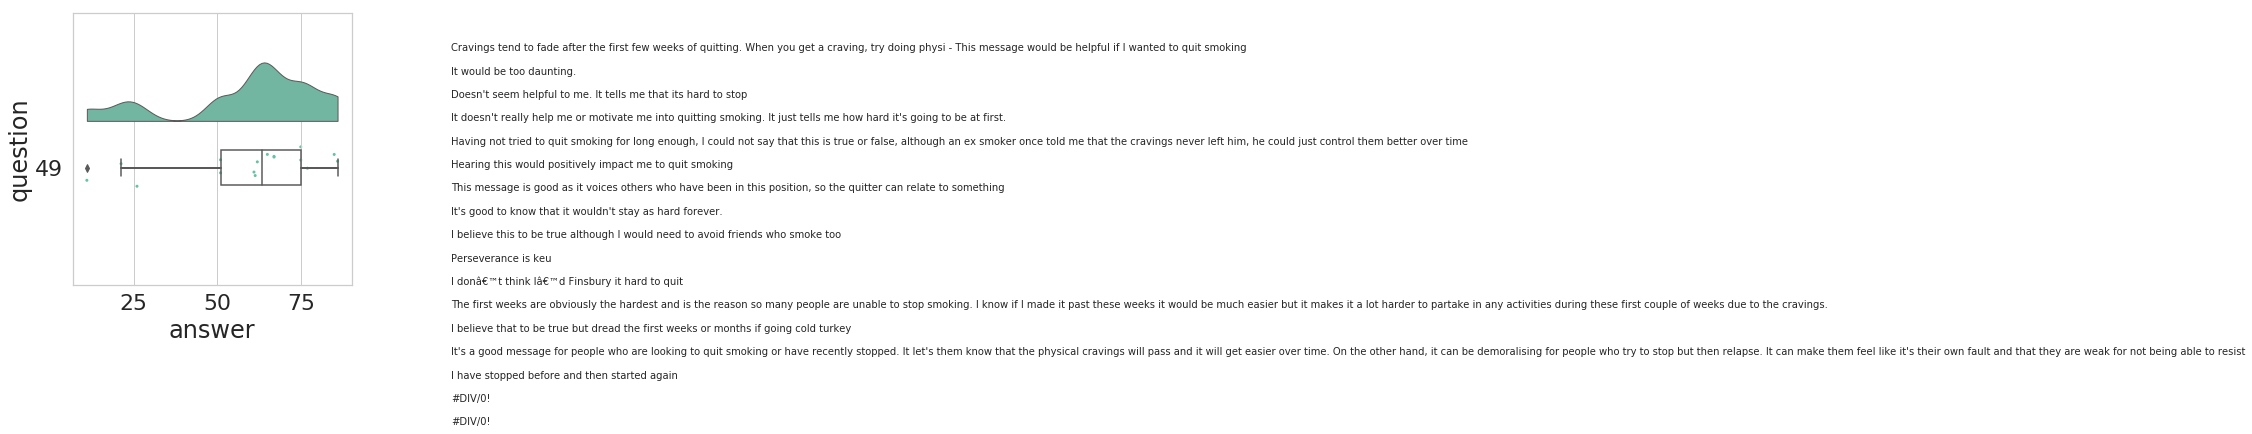

<Figure size 432x288 with 0 Axes>

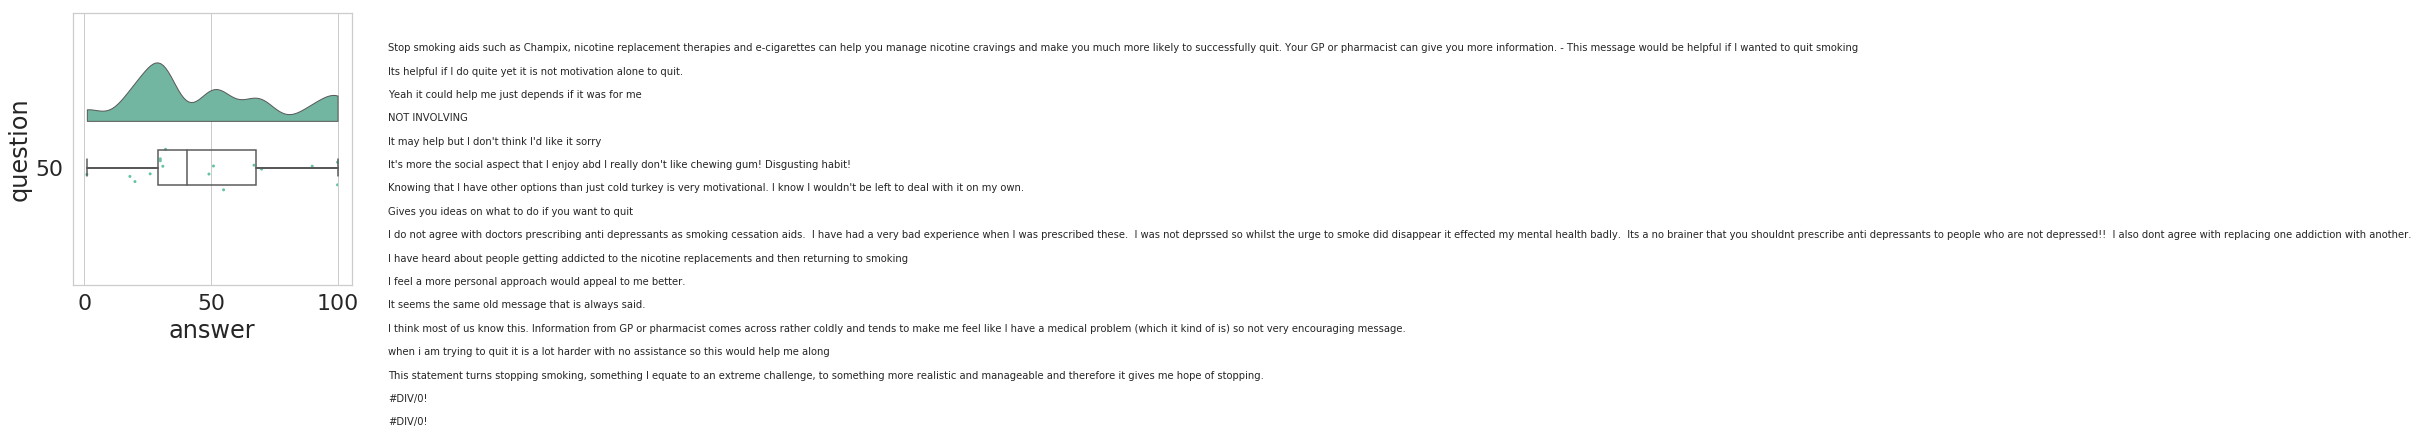

<Figure size 432x288 with 0 Axes>

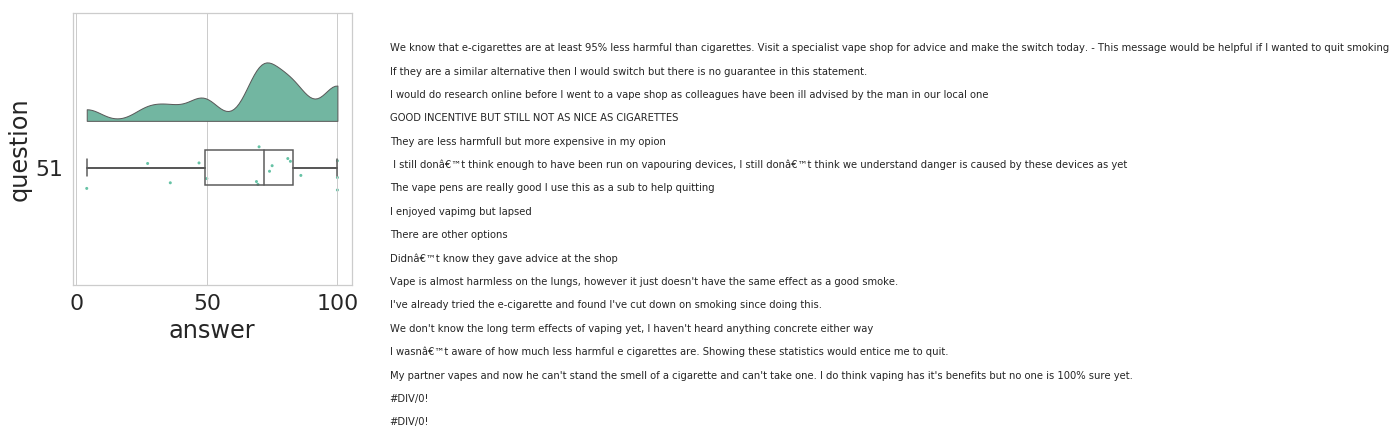

<Figure size 432x288 with 0 Axes>

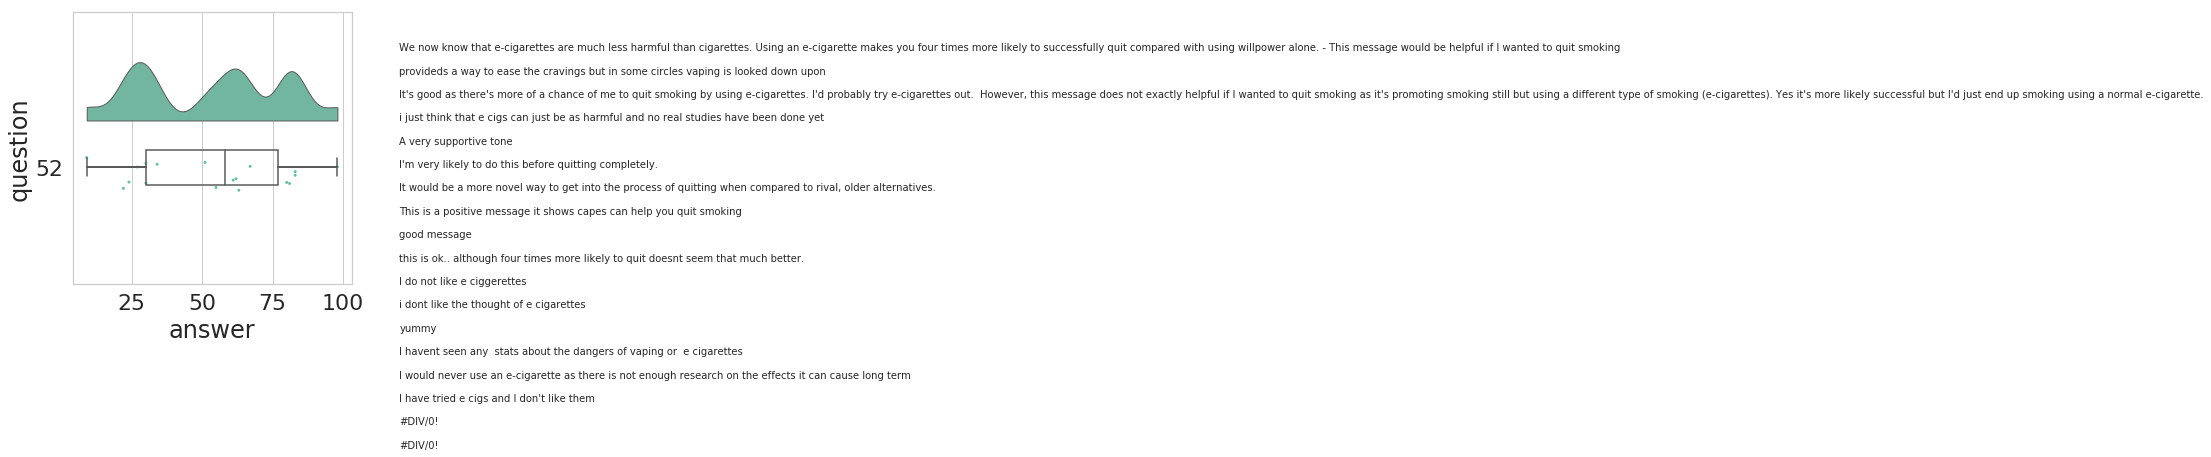

<Figure size 432x288 with 0 Axes>

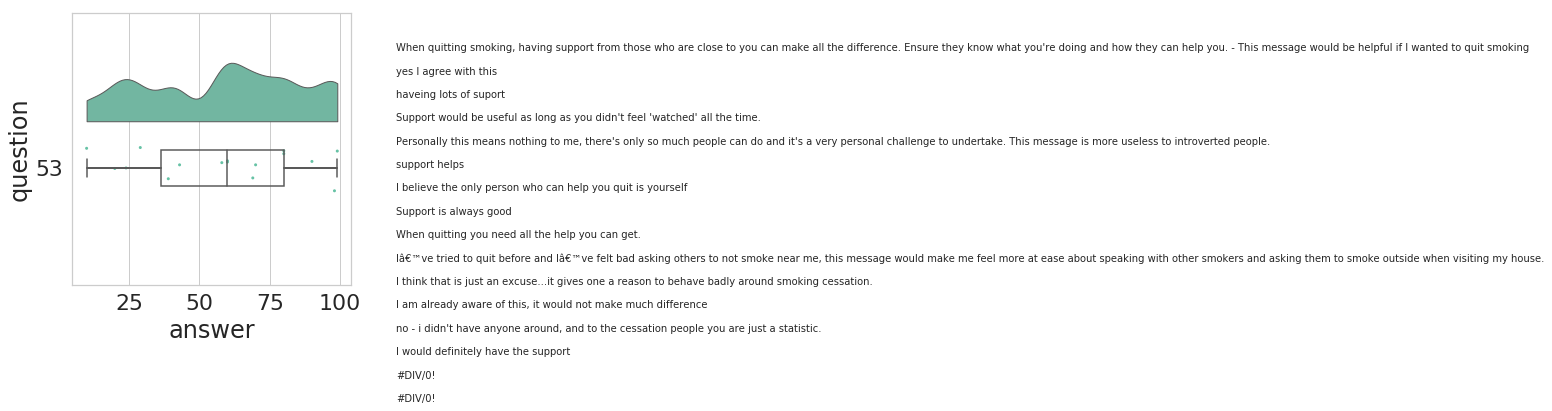

<Figure size 432x288 with 0 Axes>

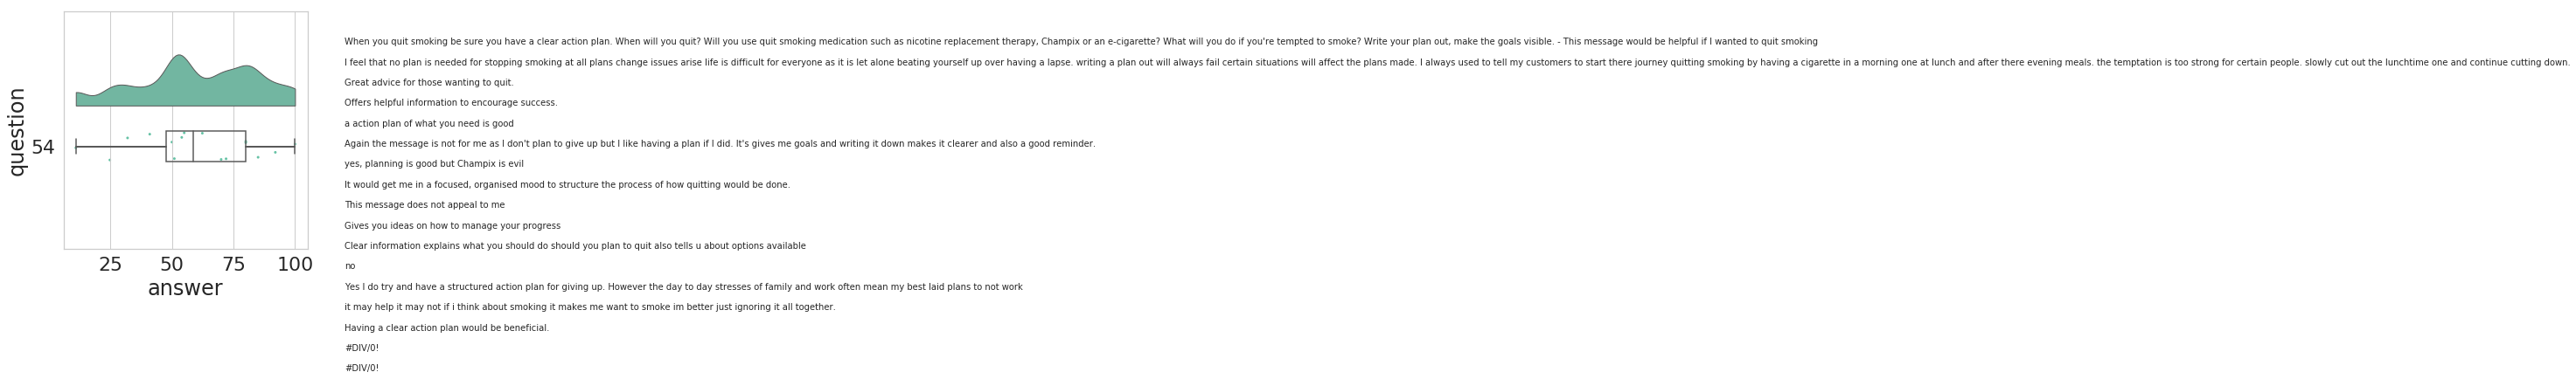

<Figure size 432x288 with 0 Axes>

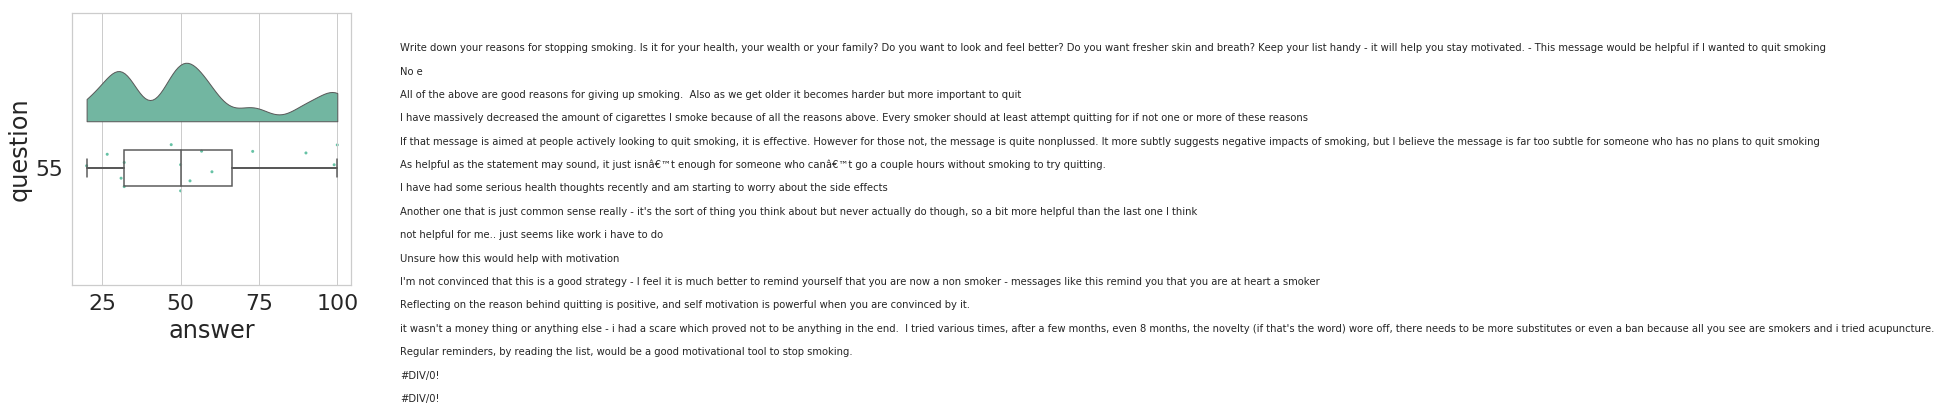

<Figure size 432x288 with 0 Axes>

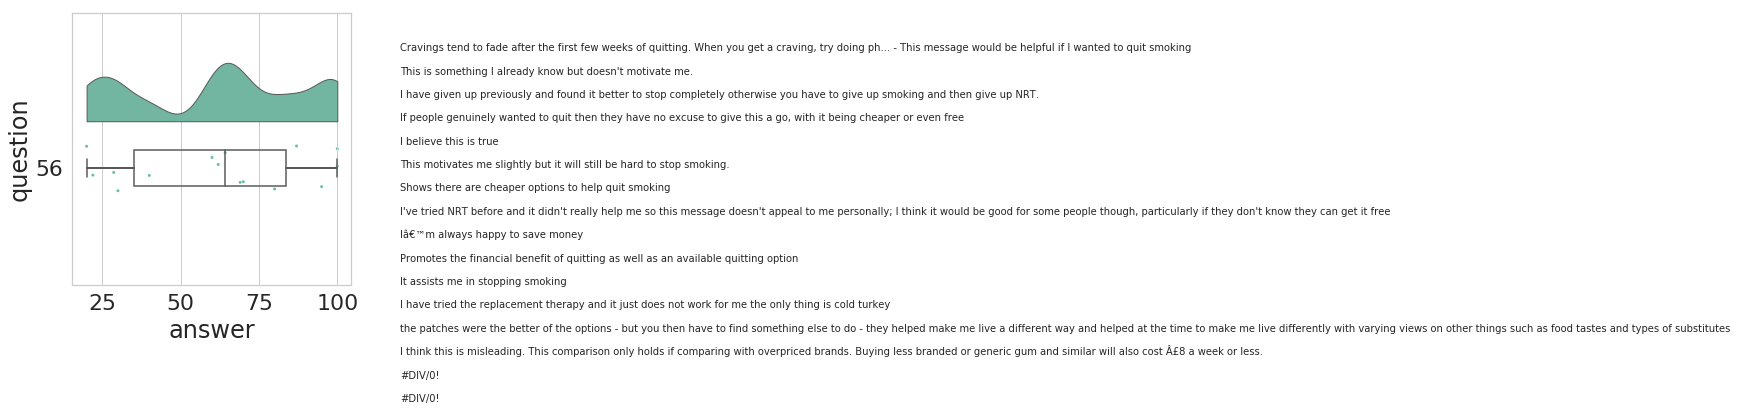

In [14]:
# plotting the clouds

#for quest in [3]:
for quest in range(1,len(np.unique(df_data['question']))):
    fig = plt.figure()
    # define subplot
   # ax = fig.add_subplot(5,5,quest)
    # get a subset of the dataframe corresponding to question quest
    df_plot=df_data.loc[df_data['question'] == quest]
    dx="question"; dy="answer"; ort="h"; pal = "Set2"; sigma = .2
    ax=pt.RainCloud(x = dx, y = dy, data = df_plot, palette = pal, bw = sigma,
                     width_viol = .5, figsize = (5,5), orient = ort)
    
    ax.text(120,-0.5,oricols[quest-1], wrap=True) #to account for diff number of columns in oricols and df_data
    
    #ax.text(120,0,df_comm.iloc[df_data[quest-1]], wrap=True) #to account for diff number of columns in oricols and df_data
    
    y=-0.4
    for comment in df_comm["comment%s" % (quest)]:
        if not isinstance(comment, float): # do not write nans
            ax.text(120,y,comment)
            y += 0.1
    
    if savefigs:
        filename = 'question'+str(quest)
        plt.savefig(os.path.join(figs_dir, filename + '.jpg'), bbox_inches='tight')

In [15]:
df_data['question']

0         1
1         1
2         1
3         1
4         1
5         1
6         1
7         1
8         1
9         1
10        1
11        1
12        1
13        1
14        1
15        1
16        1
17        1
18        1
19        1
20        1
21        1
22        1
23        1
24        1
25        1
26        1
27        1
28        1
29        1
         ..
11598    57
11599    57
11600    57
11601    57
11602    57
11603    57
11604    57
11605    57
11606    57
11607    57
11608    57
11609    57
11610    57
11611    57
11612    57
11613    57
11614    57
11615    57
11616    57
11617    57
11618    57
11619    57
11620    57
11621    57
11622    57
11623    57
11624    57
11625    57
11626    57
11627    57
Name: question, Length: 11628, dtype: int64